# **Exploratory Data Analysis on Vehicle Sales :**

## **Group Members :**

**Aadesh Minz - 202103002**

**Asish Joel - 202103015**

**Raj Kariya - 202103048**


# **Necessary Libraries Imported :**


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
import scipy.stats as stat
import pylab
import statsmodels.api as sm
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

In [ ]:
data = pd.read_csv("/content/mileage_veh.csv")

In [ ]:
data.head(10)

,Car Name,Reg month,Make Year,Engine Capacity,Insurance,Spare key,Transmission,KM Driven,Ownership,Fuel Type,Price_in_lakhs,EMI/month,Brand,Model,Mileage,Registered State
0,2016 Maruti Celerio VXI AMT,Nov-16,2016,998.0,Yes,Yes,Automatic,53167,1st owner,Petrol,4.13,"8,074",Maruti,Celerio,20.866233,Telangana
1,2020 Hyundai GRAND I10 NIOS SPORTZ 1.0 TURBO G...,Feb-21,2020,NaN,No,Yes,Manual,10622,2nd owner,Petrol,7.17,"14,017",Hyundai,GRAND,NaN,Telangana
2,2021 KIA SONET GTX PLUS 1.0 DCT DUAL TONE,Feb-21,2021,998.0,Yes,Yes,Automatic,38579,1st owner,Petrol,12.48,"23,755",KIA,SONET,20.938250,Telangana
3,2019 Hyundai NEW SANTRO SPORTZ AMT,Apr-19,2019,1086.0,No,Yes,Automatic,25316,2nd owner,Petrol,5.17,"10,113",Hyundai,NEW,17.190135,Telangana
4,2021 Tata TIGOR XE PETROL,Dec-21,2021,1199.0,Yes,Yes,Manual,47307,1st owner,Petrol,5.86,"11,456",Tata,TIGOR,17.434523,Telangana
5,2021 Maruti New Wagon-R LXI 1.0,Jun-21,2021,998.0,No,Yes,Manual,42753,1st owner,Petrol,4.92,"9,619",Maruti,New,20.316021,Telangana
6,2014 Hyundai Verna FLUIDIC 1.6 CRDI SX,Jul-14,2014,1582.0,No,No,Manual,78993,2nd owner,Diesel,5.20,"13,694",Hyundai,Verna,16.937236,Telangana
7,2022 KIA CARENS PRESTIGE PLUS 1.4 PETROL 7 STR,Sep-22,2022,1353.0,Yes,Yes,Manual,25303,1st owner,Petrol,12.67,"24,116",KIA,CARENS,16.000797,Telangana
8,2019 Ford FREESTYLE TITANIUM PLUS 1.2 PETROL,Jun-19,2019,1194.0,No,Yes,Manual,44591,1st owner,Petrol,5.54,"10,831",Ford,FREESTYLE,17.342840,Telangana
9,2017 Hyundai i20 Active 1.2 SX,Apr-17,2017,1197.0,No,Yes,Manual,95737,2nd owner,Petrol,6.31,"12,336",Hyundai,i20,17.338619,Telangana


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Car Name          700 non-null    object 
 1   Reg month         700 non-null    object 
 2   Make Year         700 non-null    int64  
 3   Engine Capacity   614 non-null    float64
 4   Insurance         700 non-null    object 
 5   Spare key         700 non-null    object 
 6   Transmission      700 non-null    object 
 7   KM Driven         700 non-null    int64  
 8   Ownership         700 non-null    object 
 9   Fuel Type         700 non-null    object 
 10  Price_in_lakhs    700 non-null    float64
 11  EMI/month         700 non-null    object 
 12  Brand             700 non-null    object 
 13  Model             700 non-null    object 
 14  Mileage           614 non-null    float64
 15  Registered State  700 non-null    object 
dtypes: float64(3), int64(2), object(11)
memory u

In [ ]:
data.columns

Index(['Car Name', 'Reg month', 'Make Year', 'Engine Capacity', 'Insurance',
       'Spare key', 'Transmission', 'KM Driven', 'Ownership', 'Fuel Type',
       'Price_in_lakhs', 'EMI/month', 'Brand', 'Model', 'Mileage',
       'Registered State'],
      dtype='object')

In [ ]:
data.describe()

,Make Year,Engine Capacity,KM Driven,Price_in_lakhs,Mileage
count,700.000000,614.000000,700.000000,700.000000,614.000000
mean,2017.624286,1334.749186,52449.572857,6.763271,17.610681
std,3.082599,358.448873,27310.655683,3.822461,1.985020
min,2010.000000,796.000000,1413.000000,1.540000,12.532217
25%,2016.000000,1197.000000,30236.250000,4.105000,16.558820
50%,2018.000000,1199.000000,49241.000000,5.840000,17.229186
75%,2020.000000,1497.000000,71761.000000,8.270000,17.830075
max,2023.000000,2982.000000,124116.000000,22.830000,21.982091


In [ ]:
data.shape

(700, 16)

In [ ]:
data.nunique()

Car Name            489
Reg month           153
Make Year            14
Engine Capacity      40
Insurance             2
Spare key             2
Transmission          2
KM Driven           576
Ownership             3
Fuel Type             3
Price_in_lakhs      432
EMI/month           491
Brand                15
Model                80
Mileage             614
Registered State     16
dtype: int64

In [ ]:
data.isnull().sum()

Car Name             0
Reg month            0
Make Year            0
Engine Capacity     86
Insurance            0
Spare key            0
Transmission         0
KM Driven            0
Ownership            0
Fuel Type            0
Price_in_lakhs       0
EMI/month            0
Brand                0
Model                0
Mileage             86
Registered State     0
dtype: int64

# **Missing Value Analysis :**

## **msno.bar plot :**

<Axes: >

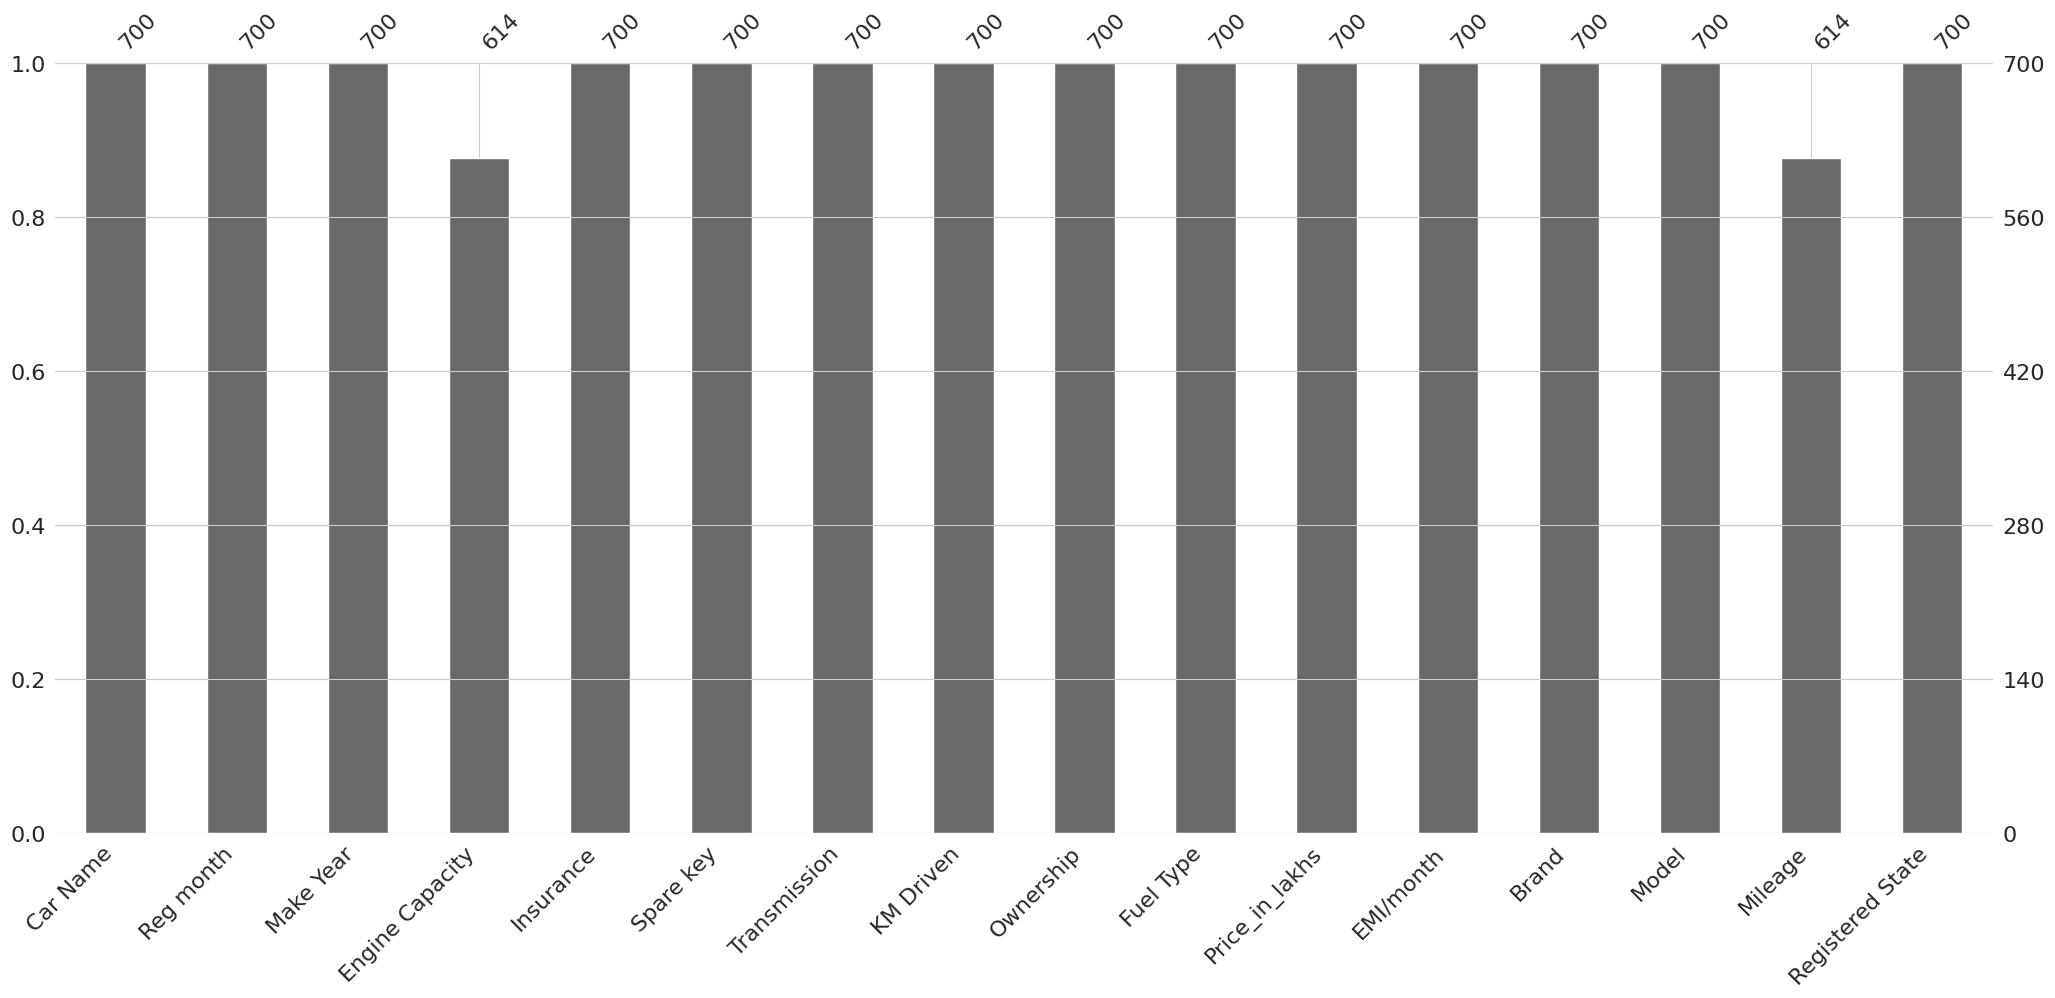

In [ ]:
msno.bar(data)

## **msno.matrix :**

<Axes: >

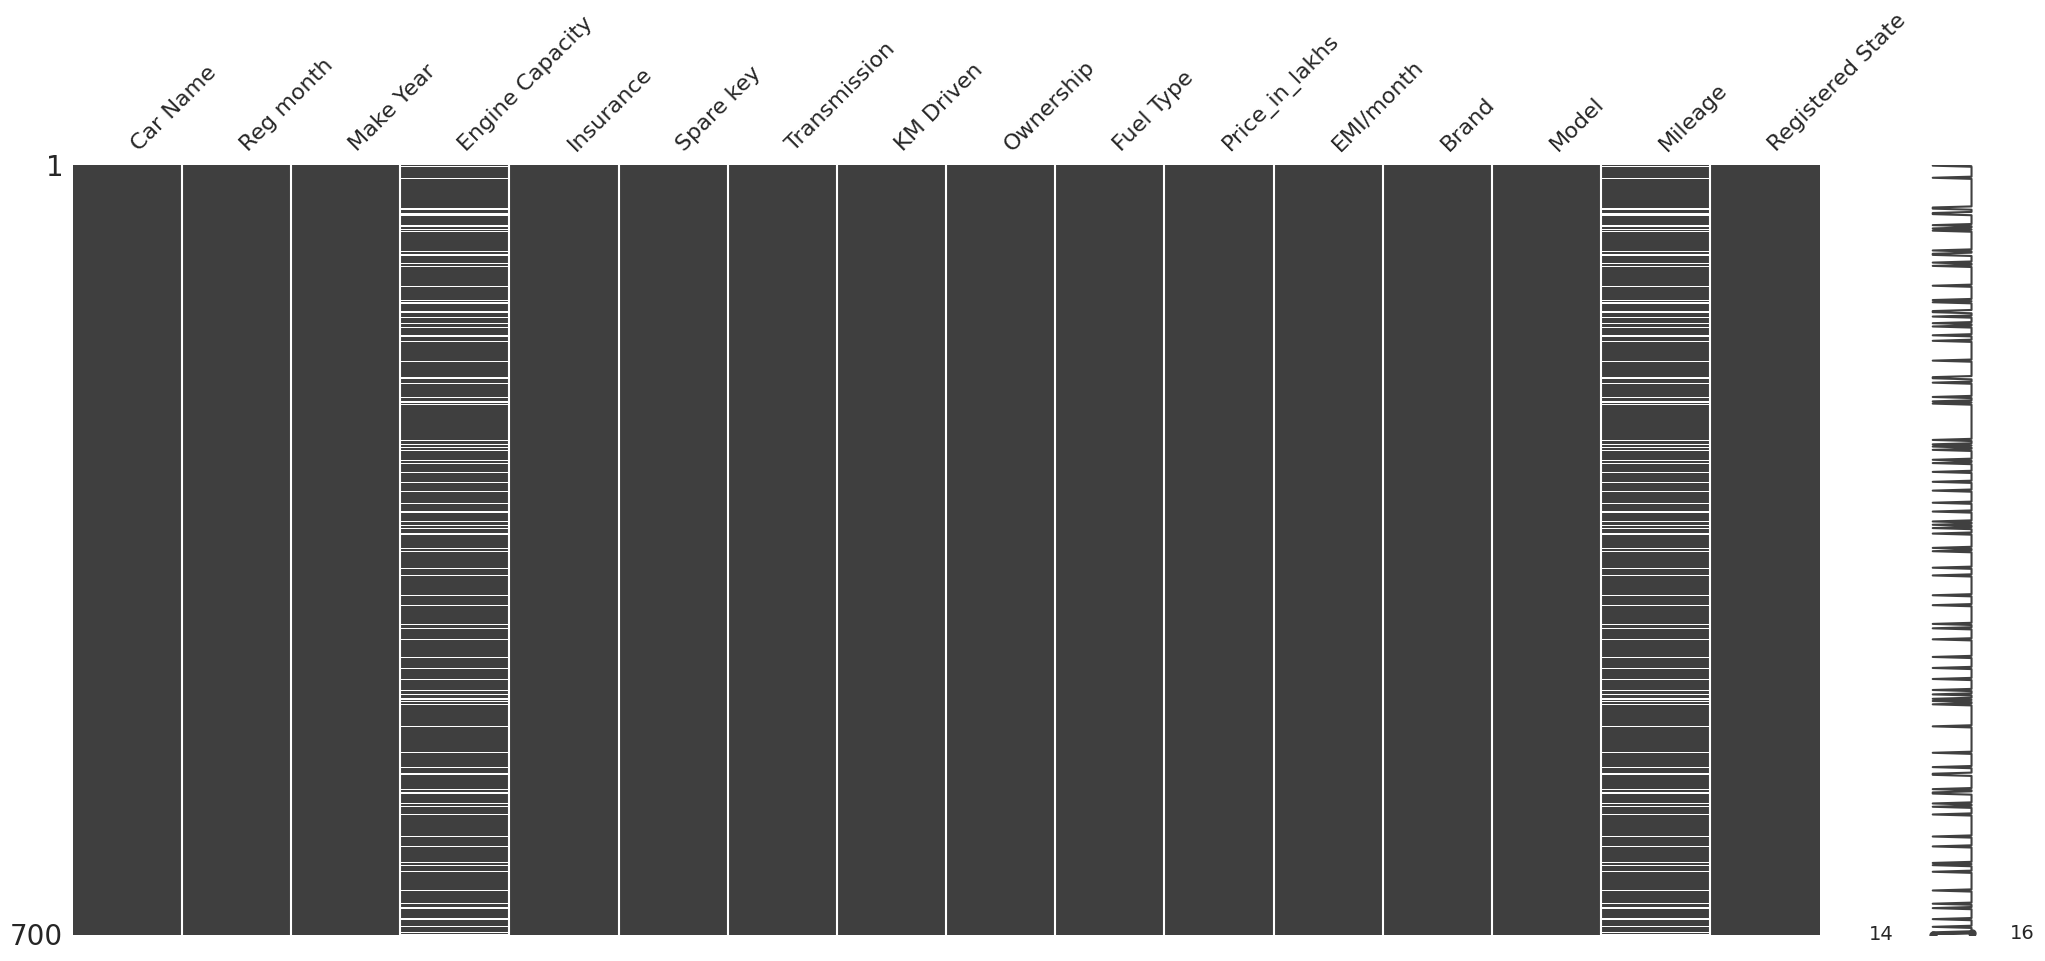

In [ ]:
msno.matrix(data)

## **msno.dendrogram :**

<Axes: >

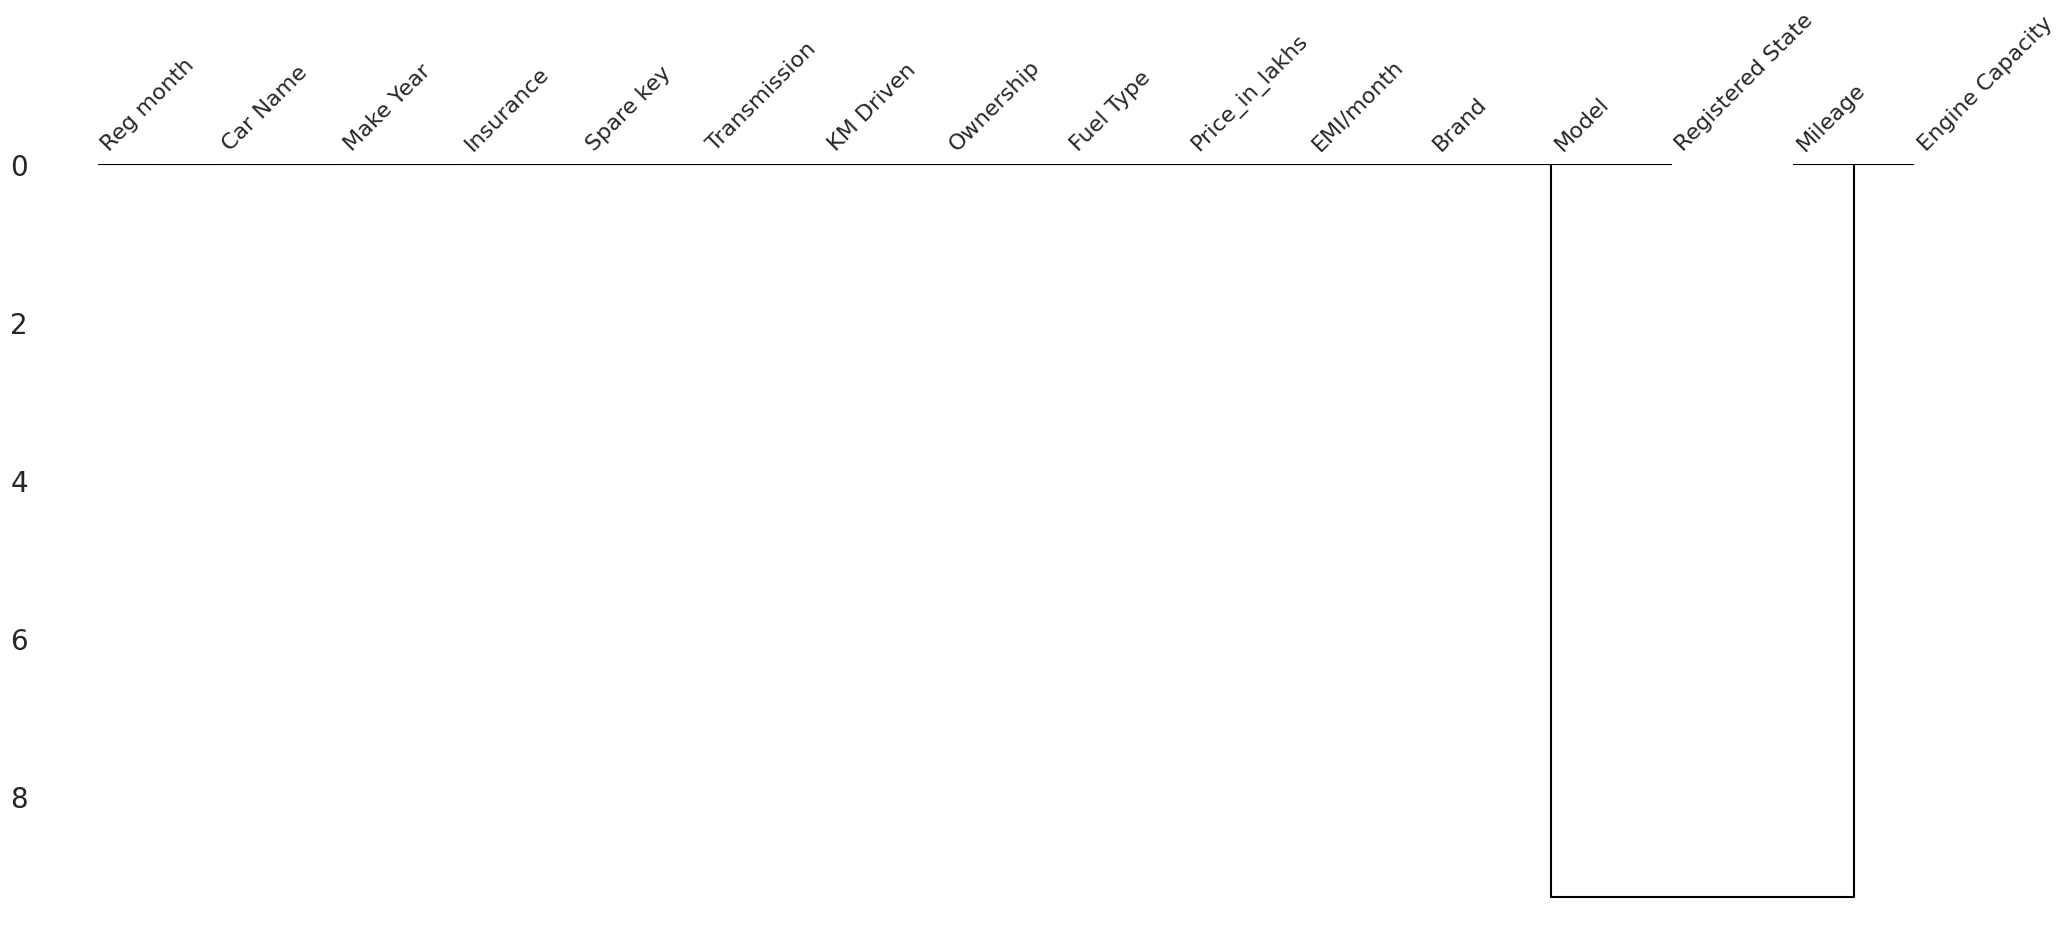

In [ ]:
msno.dendrogram(data)

# **Feature Engneering Tasks :**

## **Application of Imputation,Deletion,Encoding Technique :**

In [ ]:
data['Reg month'] = data['Reg month'].astype(str)

# Extract the month from 'Reg Year' and update the column
data['Reg month'] = data['Reg month'].str.extract('([A-Za-z]+)')

# Convert 'Insurance' and 'Spare key' from 'Yes'/'No' to boolean
data['Insurance'] = data['Insurance'].map({'Yes': True, 'No': False})
data['Spare key'] = data['Spare key'].map({'Yes': True, 'No': False})

data['EMI/month'] = data['EMI/month'].str.replace(',', '').astype(float)

cols = ['Reg month','Transmission','Ownership','Fuel Type','Brand','Model','Make Year','Registered State']
data[cols] = data[cols].astype('category')
data['Make Year'] = data['Make Year'].astype(int)

data.head()

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Car Name          700 non-null    object  
 1   Reg month         700 non-null    category
 2   Make Year         700 non-null    int64   
 3   Engine Capacity   614 non-null    float64 
 4   Insurance         700 non-null    bool    
 5   Spare key         700 non-null    bool    
 6   Transmission      700 non-null    category
 7   KM Driven         700 non-null    int64   
 8   Ownership         700 non-null    category
 9   Fuel Type         700 non-null    category
 10  Price_in_lakhs    700 non-null    float64 
 11  EMI/month         700 non-null    float64 
 12  Brand             700 non-null    category
 13  Model             700 non-null    category
 14  Mileage           614 non-null    float64 
 15  Registered State  700 non-null    category
dtypes: bool(2), category(7), f

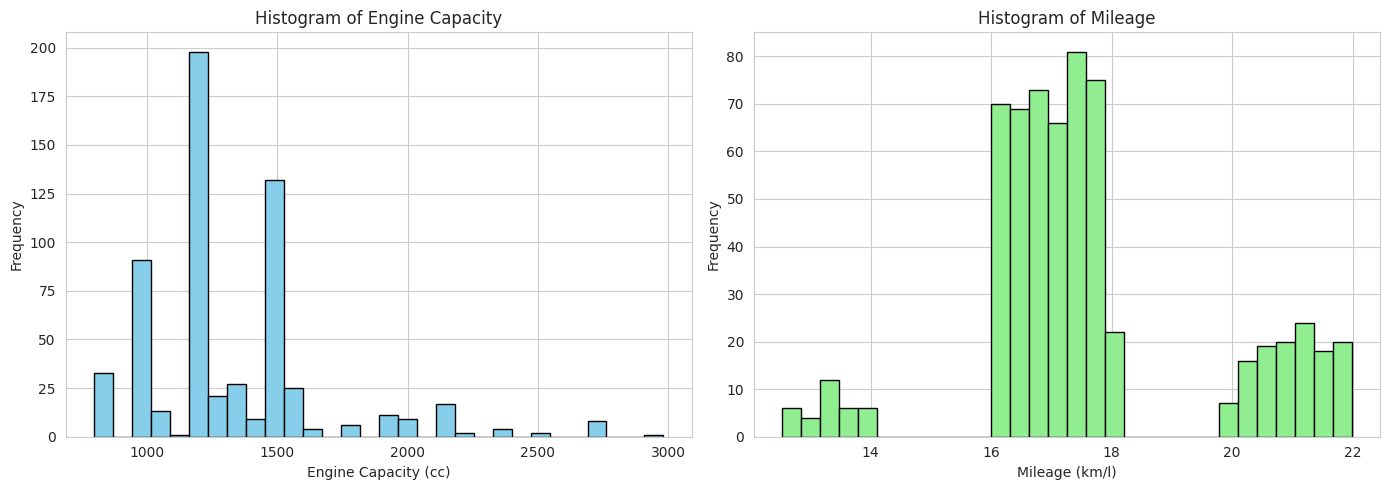

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# Engine Capacity
data['Engine Capacity'].hist(ax=ax[0], bins=30, color='skyblue', edgecolor='black')
ax[0].set_title('Histogram of Engine Capacity')
ax[0].set_xlabel('Engine Capacity (cc)')
ax[0].set_ylabel('Frequency')

# Mileage
data['Mileage'].hist(ax=ax[1], bins=30, color='lightgreen', edgecolor='black')
ax[1].set_title('Histogram of Mileage')
ax[1].set_xlabel('Mileage (km/l)')
ax[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
data['Reg month'] = data['Reg month'].astype(str)
data['Reg month'] = data['Reg month'].str.extract('([A-Za-z]+)')# Extract month from 'Reg Year'and update column

In [ ]:
# cols = ['Reg month','Transmission','Ownership','Fuel Type','Brand','Model','Car Name','Make Year','Reg Number']
# data[cols] = data[cols].astype('category')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Car Name          700 non-null    object  
 1   Reg month         700 non-null    object  
 2   Make Year         700 non-null    int64   
 3   Engine Capacity   614 non-null    float64 
 4   Insurance         700 non-null    bool    
 5   Spare key         700 non-null    bool    
 6   Transmission      700 non-null    category
 7   KM Driven         700 non-null    int64   
 8   Ownership         700 non-null    category
 9   Fuel Type         700 non-null    category
 10  Price_in_lakhs    700 non-null    float64 
 11  EMI/month         700 non-null    float64 
 12  Brand             700 non-null    category
 13  Model             700 non-null    category
 14  Mileage           614 non-null    float64 
 15  Registered State  700 non-null    category
dtypes: bool(2), category(6), f

In [ ]:
data.head()

,Car Name,Reg month,Make Year,Engine Capacity,Insurance,Spare key,Transmission,KM Driven,Ownership,Fuel Type,Price_in_lakhs,EMI/month,Brand,Model,Mileage,Registered State
0,2016 Maruti Celerio VXI AMT,Nov,2016,998.0,True,True,Automatic,53167,1st owner,Petrol,4.13,8074.0,Maruti,Celerio,20.866233,Telangana
1,2020 Hyundai GRAND I10 NIOS SPORTZ 1.0 TURBO G...,Feb,2020,NaN,False,True,Manual,10622,2nd owner,Petrol,7.17,14017.0,Hyundai,GRAND,NaN,Telangana
2,2021 KIA SONET GTX PLUS 1.0 DCT DUAL TONE,Feb,2021,998.0,True,True,Automatic,38579,1st owner,Petrol,12.48,23755.0,KIA,SONET,20.938250,Telangana
3,2019 Hyundai NEW SANTRO SPORTZ AMT,Apr,2019,1086.0,False,True,Automatic,25316,2nd owner,Petrol,5.17,10113.0,Hyundai,NEW,17.190135,Telangana
4,2021 Tata TIGOR XE PETROL,Dec,2021,1199.0,True,True,Manual,47307,1st owner,Petrol,5.86,11456.0,Tata,TIGOR,17.434523,Telangana


In [ ]:
# Impute missing values
data['Engine Capacity'].fillna(data['Engine Capacity'].mean(), inplace=True)
data['Mileage'].fillna(data['Mileage'].median(), inplace=True)

In [ ]:
data.isnull().sum()

Car Name            0
Reg month           0
Make Year           0
Engine Capacity     0
Insurance           0
Spare key           0
Transmission        0
KM Driven           0
Ownership           0
Fuel Type           0
Price_in_lakhs      0
EMI/month           0
Brand               0
Model               0
Mileage             0
Registered State    0
dtype: int64

In [ ]:
data.shape

(700, 16)

In [ ]:
data['Age_of_vehicle'] = 2024 - data['Make Year']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# One-hot encoding for categorical variables without a natural order
one_hot_cols = ['Transmission', 'Fuel Type']
data_encoded = pd.get_dummies(data, columns=one_hot_cols)

In [ ]:
# Ordinal encoding for 'Ownership' as it has a natural order
ownership_order = ['1st owner', '2nd owner', '3rd owner']
ordinal_encoder = OrdinalEncoder(categories=[ownership_order])
data_encoded['Ownership'] = ordinal_encoder.fit_transform(data[['Ownership']])

In [ ]:
data_encoded

,Car Name,Reg month,Make Year,Engine Capacity,Insurance,Spare key,KM Driven,Ownership,Price_in_lakhs,EMI/month,Brand,Model,Mileage,Registered State,Age_of_vehicle,Transmission_Automatic,Transmission_Manual,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Petrol
0,2016 Maruti Celerio VXI AMT,Nov,2016,998.000000,True,True,53167,0.0,4.13,8074.0,Maruti,Celerio,20.866233,Telangana,8,True,False,False,False,True
1,2020 Hyundai GRAND I10 NIOS SPORTZ 1.0 TURBO G...,Feb,2020,1334.749186,False,True,10622,1.0,7.17,14017.0,Hyundai,GRAND,17.229186,Telangana,4,False,True,False,False,True
2,2021 KIA SONET GTX PLUS 1.0 DCT DUAL TONE,Feb,2021,998.000000,True,True,38579,0.0,12.48,23755.0,KIA,SONET,20.938250,Telangana,3,True,False,False,False,True
3,2019 Hyundai NEW SANTRO SPORTZ AMT,Apr,2019,1086.000000,False,True,25316,1.0,5.17,10113.0,Hyundai,NEW,17.190135,Telangana,5,True,False,False,False,True
4,2021 Tata TIGOR XE PETROL,Dec,2021,1199.000000,True,True,47307,0.0,5.86,11456.0,Tata,TIGOR,17.434523,Telangana,3,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2017 Maruti Ciaz ALPHA 1.4 PETROL,Oct,2017,1373.000000,False,False,65385,0.0,5.82,11378.0,Maruti,Ciaz,17.497993,Uttar Pradesh,7,False,True,False,False,True
696,2017 Maruti Ciaz DELTA 1.4 MT PETROL,Aug,2017,1373.000000,False,True,48565,0.0,6.02,11769.0,Maruti,Ciaz,17.782142,Delhi,7,False,True,False,False,True
697,2018 Maruti Ciaz SIGMA 1.5 SHVS MT PETROL,Feb,2018,1334.749186,False,True,42990,0.0,6.84,13372.0,Maruti,Ciaz,17.229186,Delhi,6,False,True,False,False,True
698,2018 Maruti Ciaz ALPHA AT 1.4 PETROL,Jul,2018,1373.000000,False,False,48743,1.0,7.42,14506.0,Maruti,Ciaz,16.593284,Haryana,6,True,False,False,False,True


In [ ]:
data_encoded.shape

(700, 20)

# Feature Extraction

In [ ]:
data['Age_of_vehicle'] = 2024 - data['Make Year']

# Data Visualization of Trends

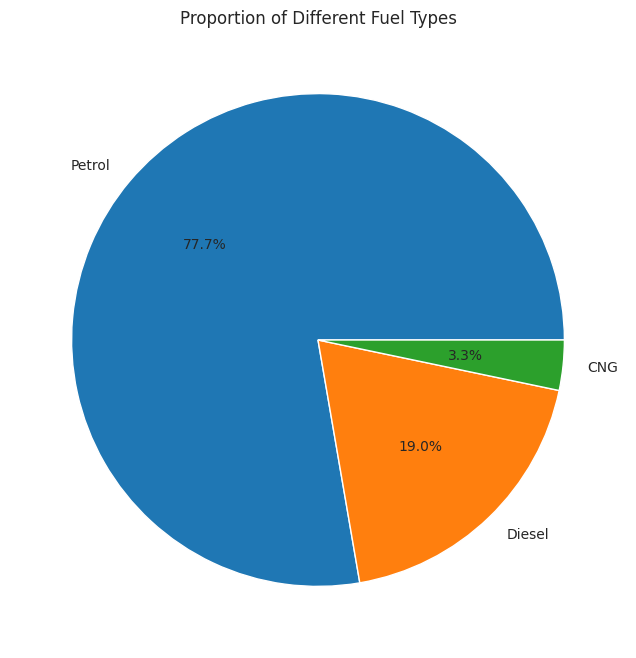

In [ ]:
plt.figure(figsize=(8, 8))
data['Fuel Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Proportion of Different Fuel Types')
plt.ylabel('')
plt.show()

Text(0.5, 1.0, 'Type of fuels cars sold over the years')

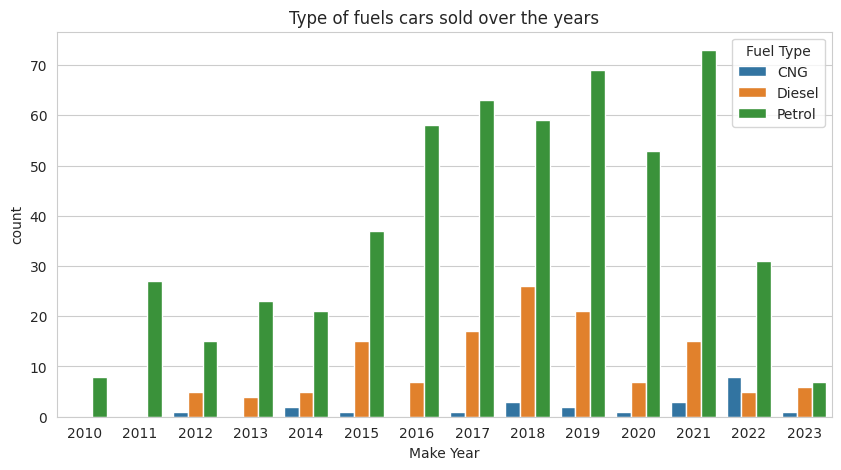

In [ ]:
plt.figure(figsize=(10,5))
sns.countplot(data=data, x='Make Year',hue='Fuel Type')
#sns.set(rc={'figure.figsize':(10,15)})
plt.title("Type of fuels cars sold over the years")

# **Univariate Analysis :**

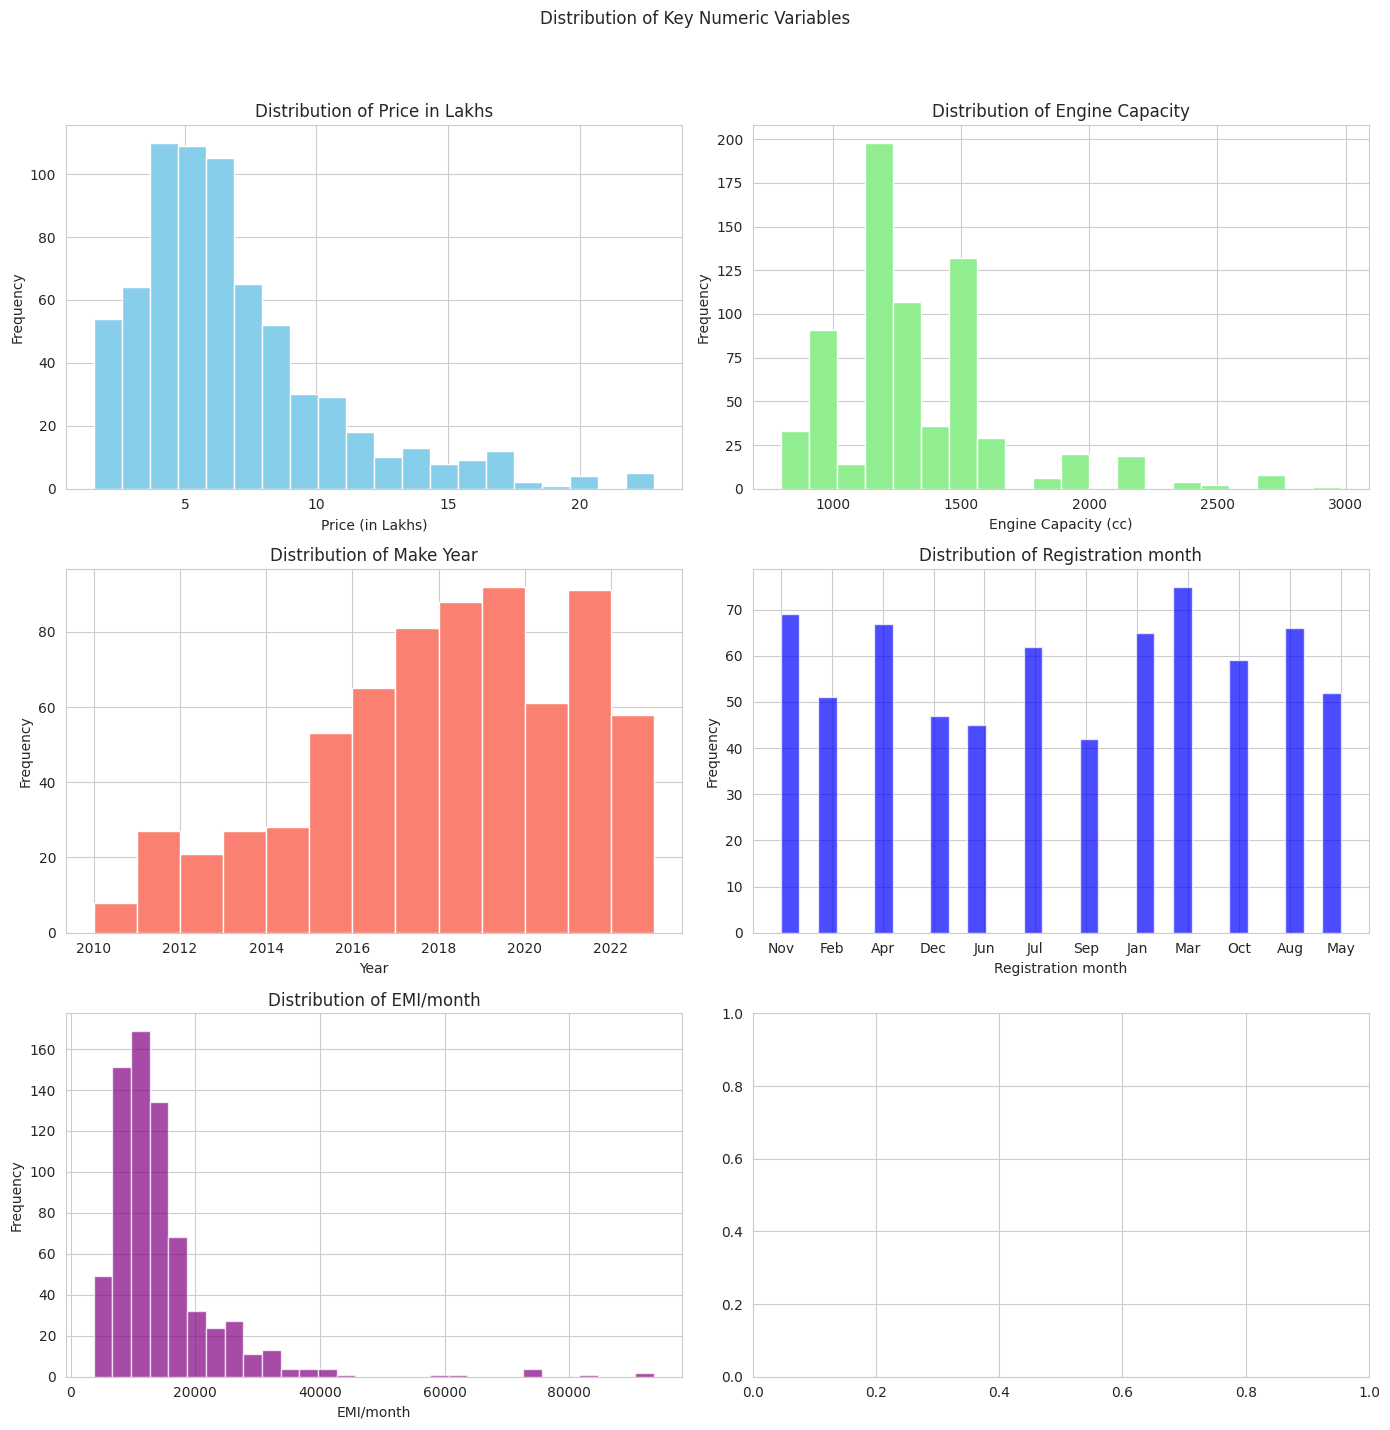

In [ ]:
# Check if 'KM Driven' needs cleaning and conversion
if data['KM Driven'].dtype == object:
    data['KM Driven'] = data['KM Driven'].str.replace(' km', '').str.replace(',', '').astype(float)

# Check if 'EMI/month' needs cleaning and conversion
if data['EMI/month'].dtype == object:
    data['EMI/month'] = data['EMI/month'].str.replace(',', '').astype(float)

# Generating histograms for key numeric variables
fig, axes = plt.subplots(3, 2, figsize=(14, 15))
fig.suptitle('Distribution of Key Numeric Variables')

axes[0, 0].hist(data['Price_in_lakhs'], bins=20, color='skyblue')
axes[0, 0].set_title('Distribution of Price in Lakhs')
axes[0, 0].set_xlabel('Price (in Lakhs)')
axes[0, 0].set_ylabel('Frequency')

axes[0, 1].hist(data['Engine Capacity'].dropna(), bins=20, color='lightgreen')
axes[0, 1].set_title('Distribution of Engine Capacity')
axes[0, 1].set_xlabel('Engine Capacity (cc)')
axes[0, 1].set_ylabel('Frequency')

axes[1, 0].hist(data['Make Year'], bins=range(data['Make Year'].min(), data['Make Year'].max() + 1), color='salmon')
axes[1, 0].set_title('Distribution of Make Year')
axes[1, 0].set_xlabel('Year')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(data['Reg month'].astype(str), bins=30, color='blue', alpha=0.7)
axes[1, 1].set_title('Distribution of Registration month')
axes[1, 1].set_xlabel('Registration month')
axes[1, 1].set_ylabel('Frequency')

axes[2, 0].hist(data['EMI/month'], bins=30, color='purple', alpha=0.7)
axes[2, 0].set_title('Distribution of EMI/month')
axes[2, 0].set_xlabel('EMI/month')
axes[2, 0].set_ylabel('Frequency')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

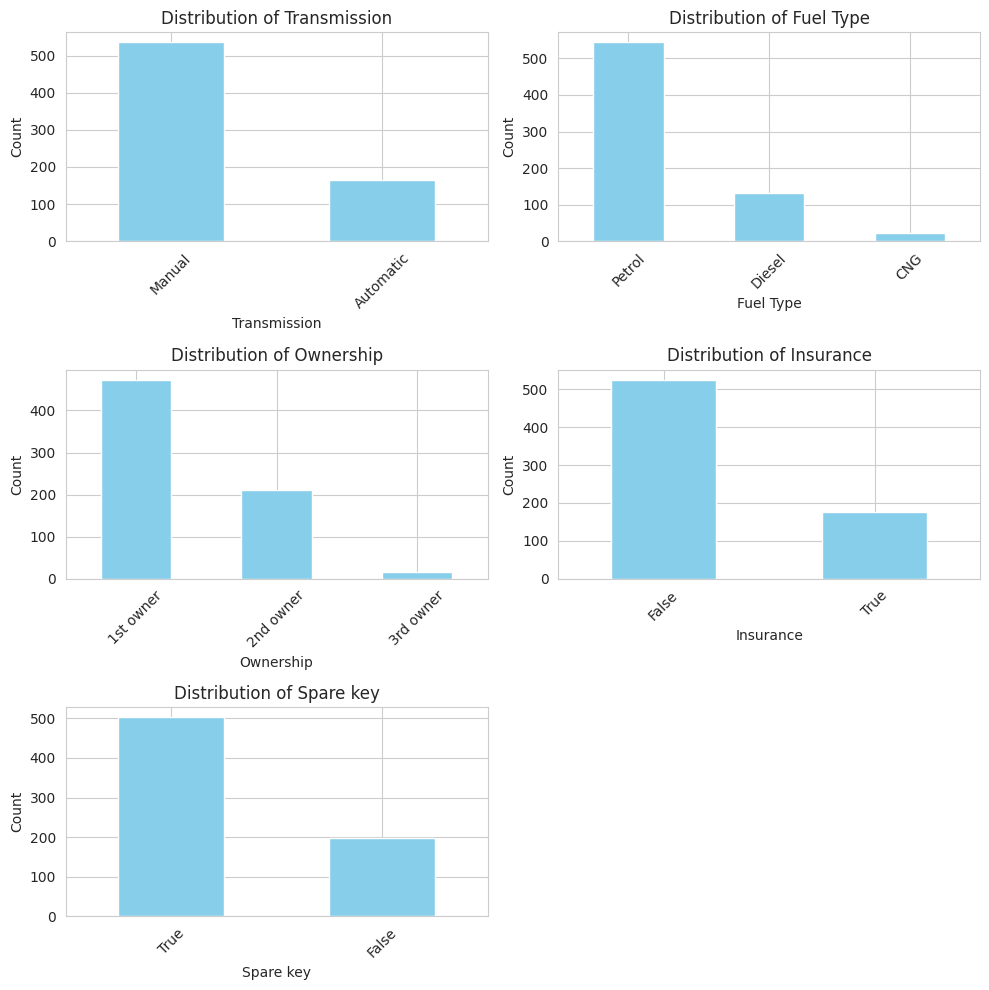

In [ ]:
plt.figure(figsize=(10, 10))

# List of categorical features to plot
categorical_features = ['Transmission', 'Fuel Type', 'Ownership', 'Insurance', 'Spare key']

for i, feature in enumerate(categorical_features, 1):
    plt.subplot(3, 2, i)
    data[feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

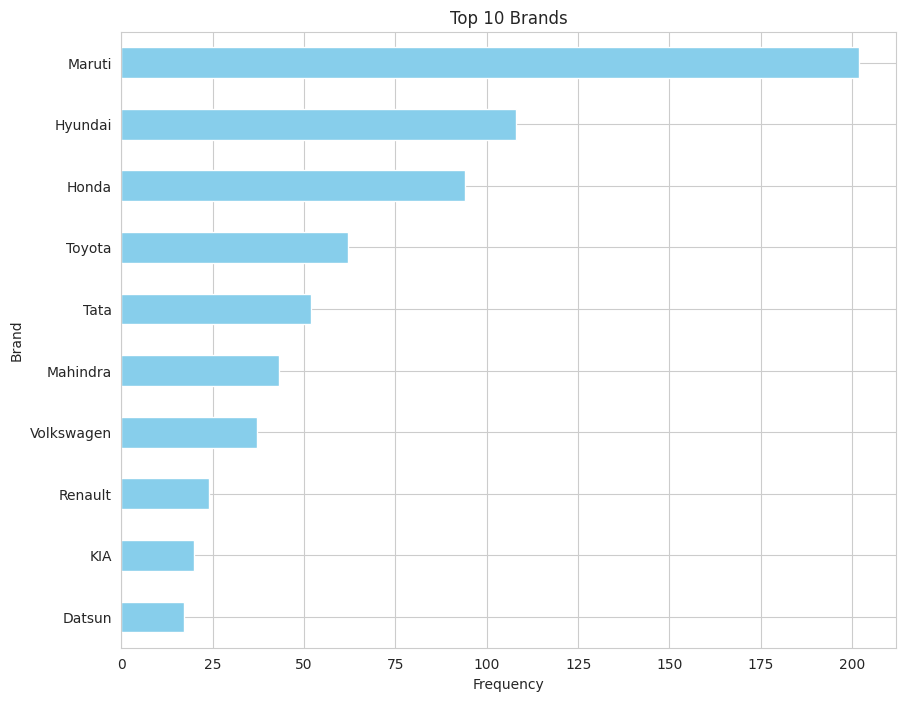

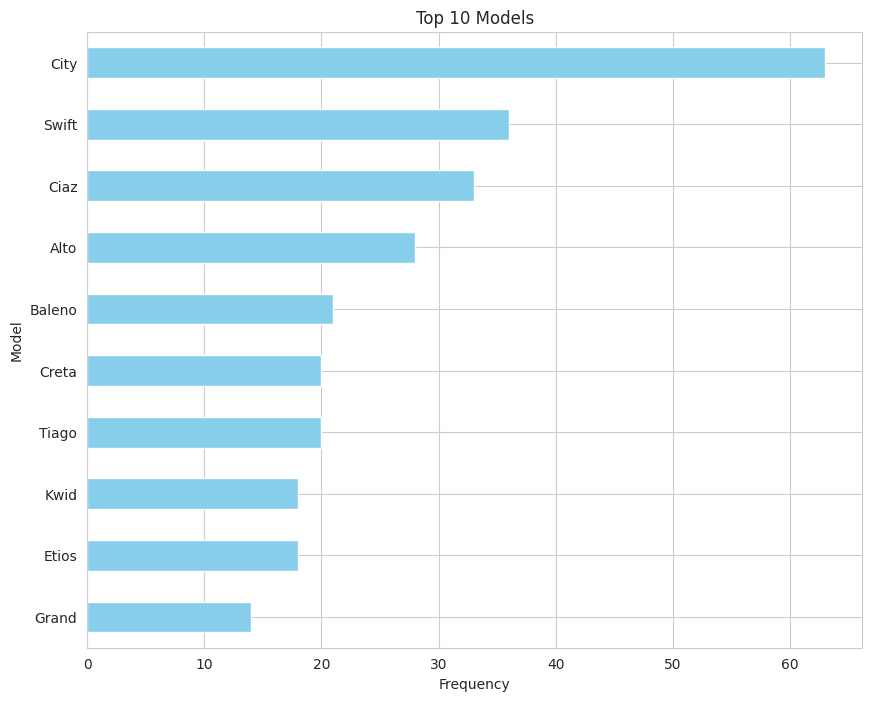

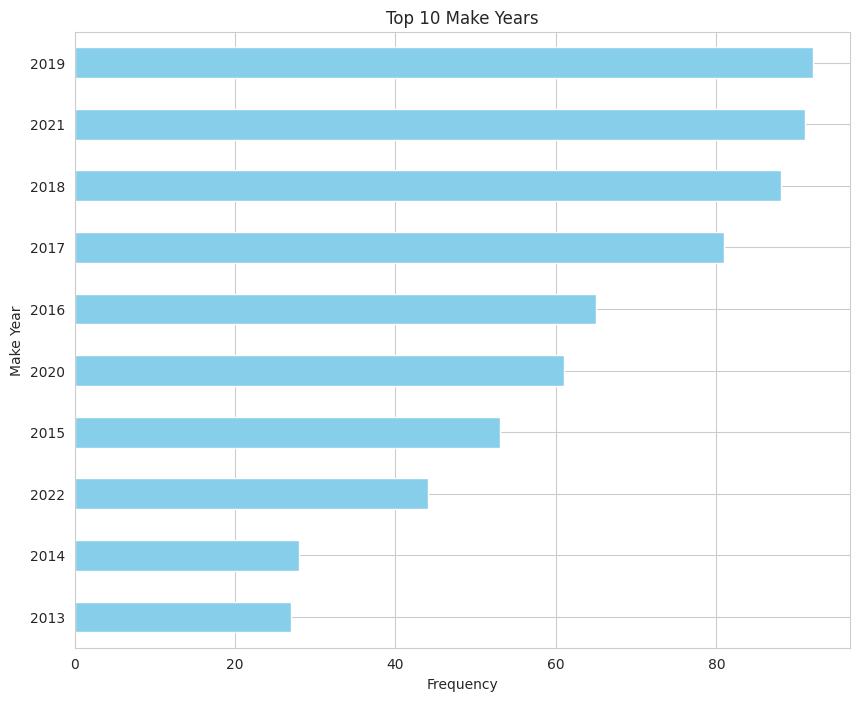

In [ ]:
def plot_top_10(column, title):
    top_10 = data[column].value_counts().nlargest(10)
    plt.figure(figsize=(10, 8))
    top_10.plot(kind='barh', color='skyblue')
    plt.title(f'Top 10 {title}')
    plt.xlabel('Frequency')
    plt.gca().invert_yaxis()  # Invert y axis to have the largest bar on top
    plt.show()

# Generate plots
plot_top_10('Brand', 'Brands')
plot_top_10('Model', 'Models')
plot_top_10('Make Year', 'Make Years')

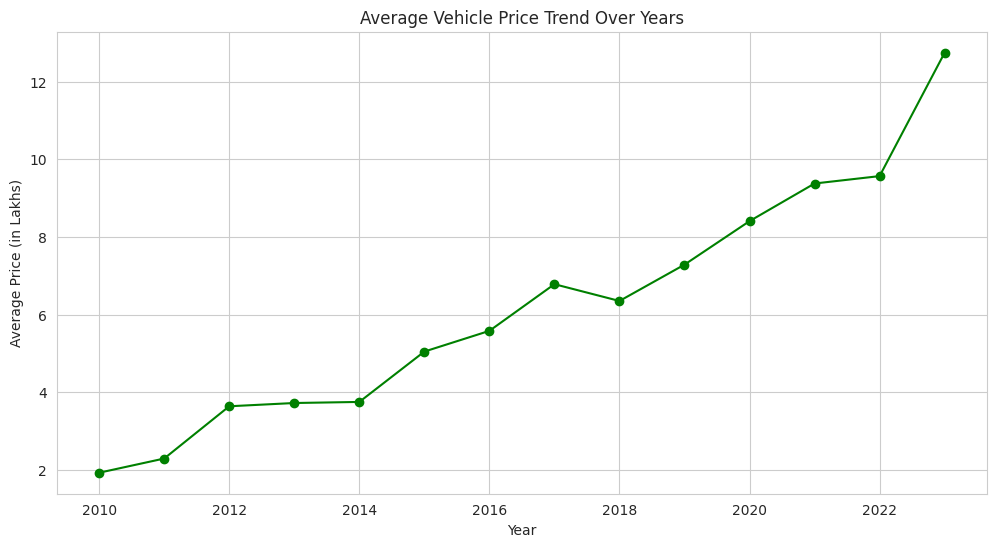

In [ ]:
# Calculate the average price per year
average_price_trends = data.groupby('Make Year')['Price_in_lakhs'].mean()

# Plotting
plt.figure(figsize=(12, 6))
average_price_trends.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title('Average Vehicle Price Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Price (in Lakhs)')
plt.grid(True)
plt.show()


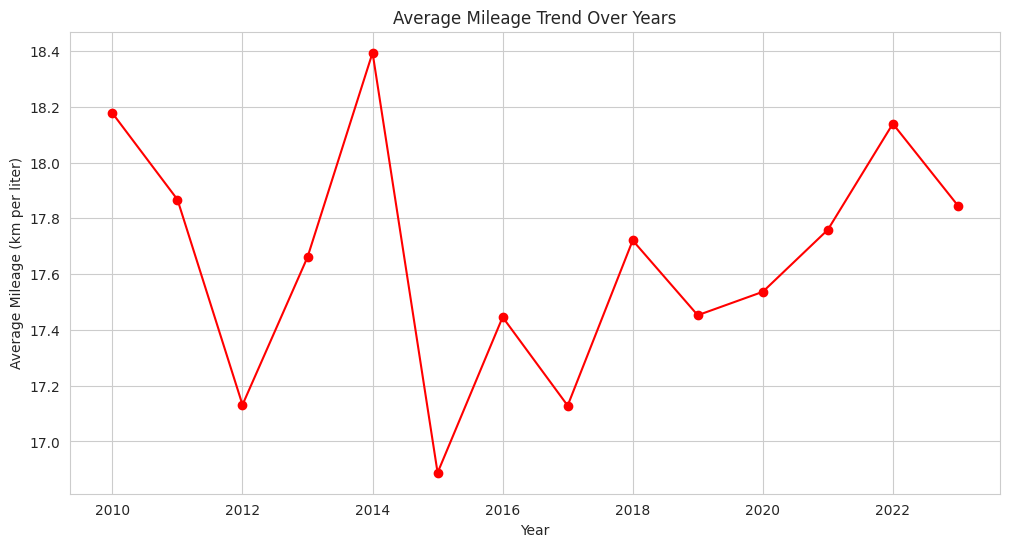

In [ ]:
# Calculate the average mileage per year
mileage_trends = data.groupby('Make Year')['Mileage'].mean()

# Plotting
plt.figure(figsize=(12, 6))
mileage_trends.plot(kind='line', marker='o', linestyle='-', color='red')
plt.title('Average Mileage Trend Over Years')
plt.xlabel('Year')
plt.ylabel('Average Mileage (km per liter)')
plt.grid(True)
plt.show()

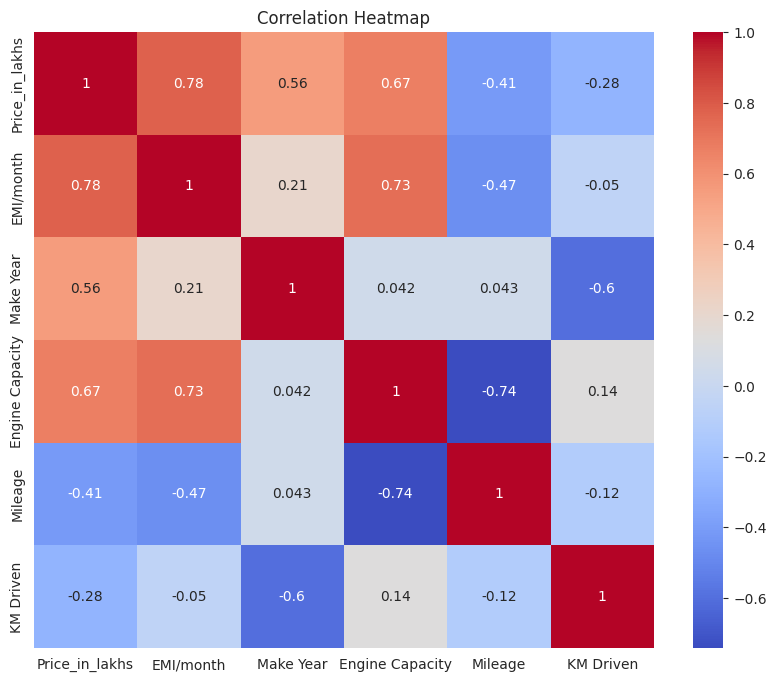

In [ ]:
corr_matrix = data[['Price_in_lakhs', 'EMI/month', 'Make Year', 'Engine Capacity', 'Mileage', 'KM Driven']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

# **Bivariate Analysis :**

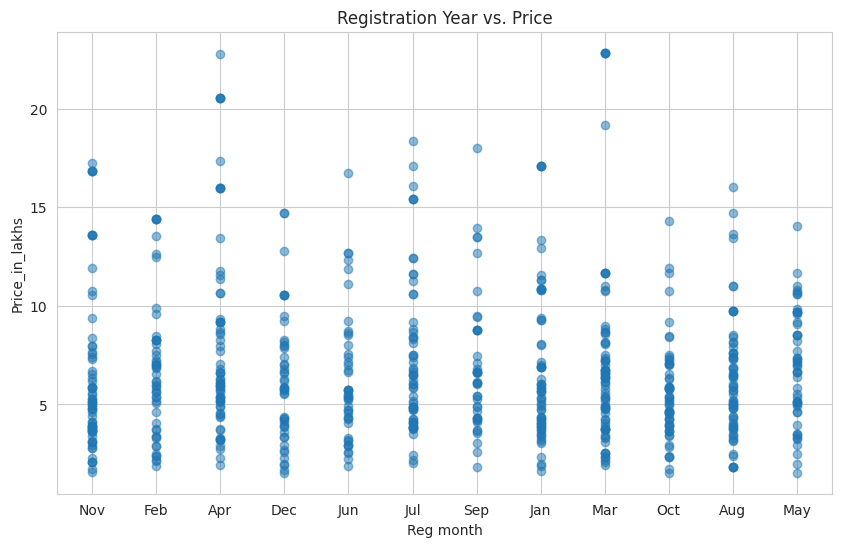

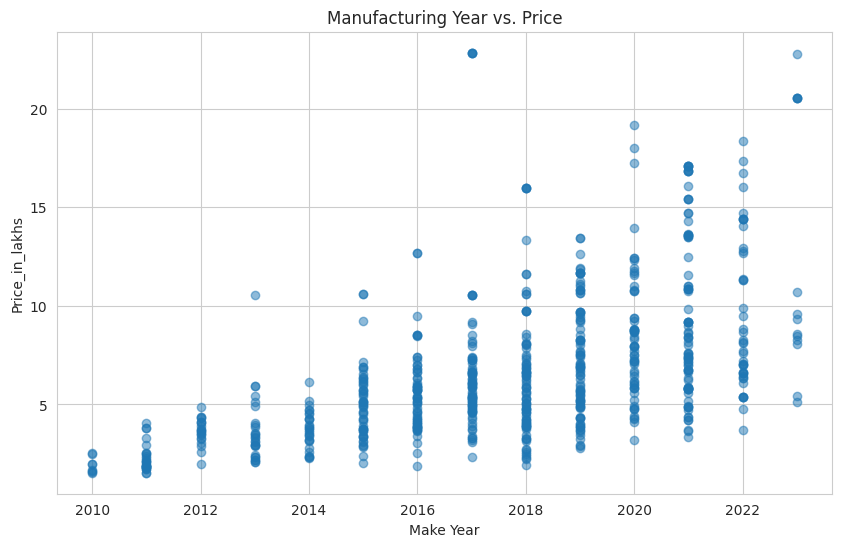

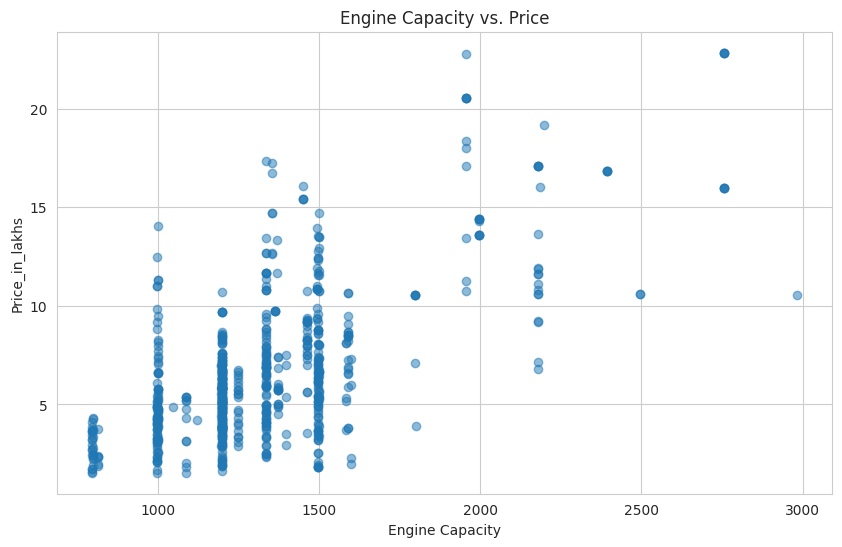

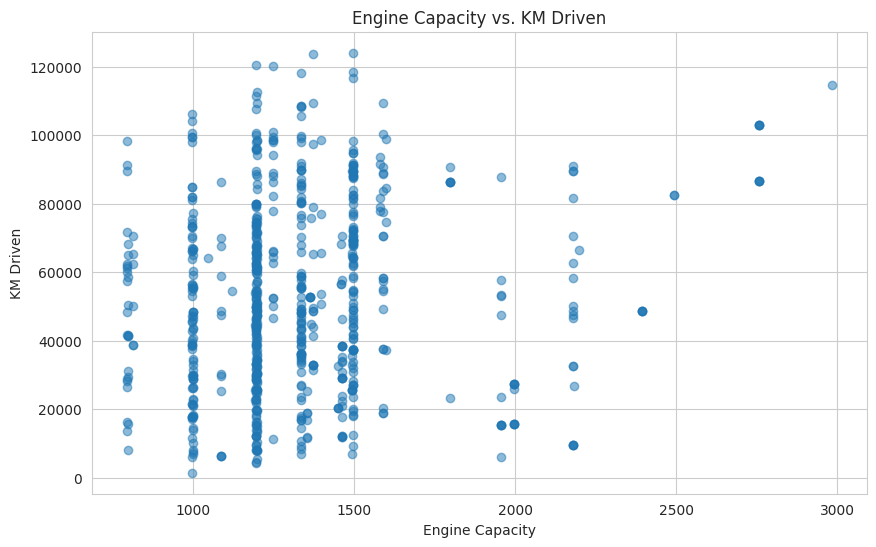

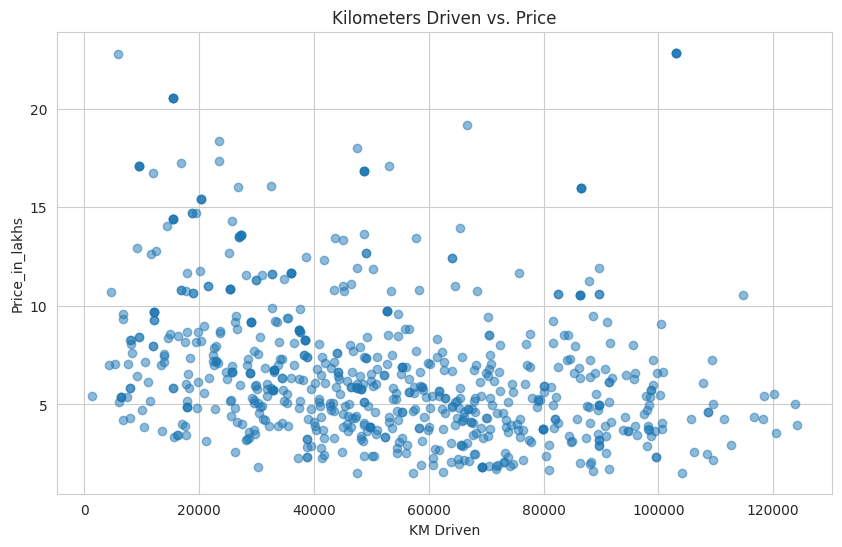

In [ ]:
# Function to create scatter plots
def plot_scatter(x, y, title):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x], data[y], alpha=0.5)
    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.show()

plot_scatter('Reg month', 'Price_in_lakhs', 'Registration Year vs. Price')
plot_scatter('Make Year', 'Price_in_lakhs', 'Manufacturing Year vs. Price')
plot_scatter('Engine Capacity', 'Price_in_lakhs', 'Engine Capacity vs. Price')
plot_scatter('Engine Capacity', 'KM Driven', 'Engine Capacity vs. KM Driven')
plot_scatter('KM Driven', 'Price_in_lakhs', 'Kilometers Driven vs. Price')

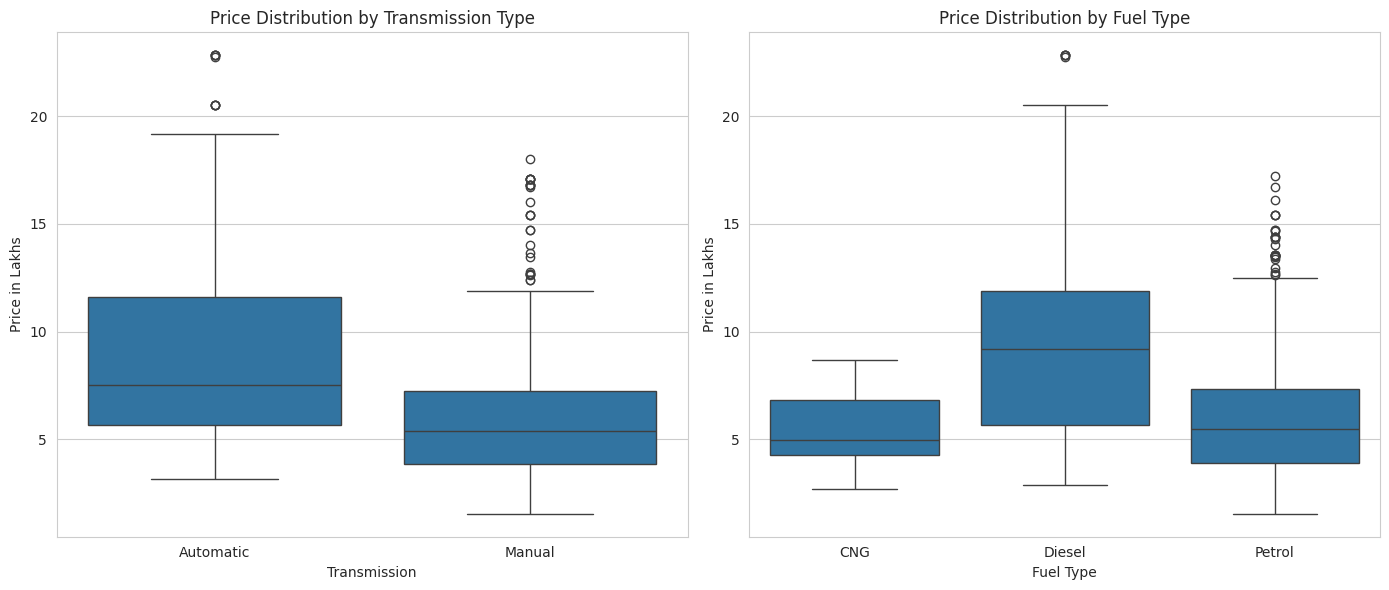

In [ ]:
sns.set_style("whitegrid")
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Boxplot for Transmission vs Price_in_lakhs
sns.boxplot(data=data, x='Transmission', y='Price_in_lakhs', ax=ax[0])
ax[0].set_title('Price Distribution by Transmission Type')
ax[0].set_xlabel('Transmission')
ax[0].set_ylabel('Price in Lakhs')

# Boxplot for Fuel Type vs Price_in_lakhs
sns.boxplot(data=data, x='Fuel Type', y='Price_in_lakhs', ax=ax[1])
ax[1].set_title('Price Distribution by Fuel Type')
ax[1].set_xlabel('Fuel Type')
ax[1].set_ylabel('Price in Lakhs')

plt.tight_layout()
plt.show()

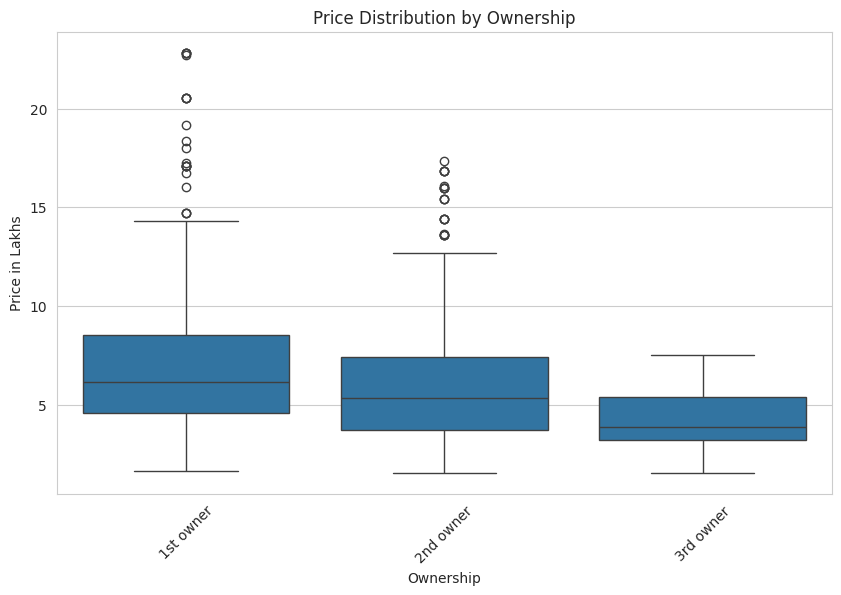

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Ownership', y='Price_in_lakhs', order=['1st owner', '2nd owner', '3rd owner'])
plt.title('Price Distribution by Ownership')
plt.xlabel('Ownership')
plt.ylabel('Price in Lakhs')
plt.xticks(rotation=45)
plt.show()

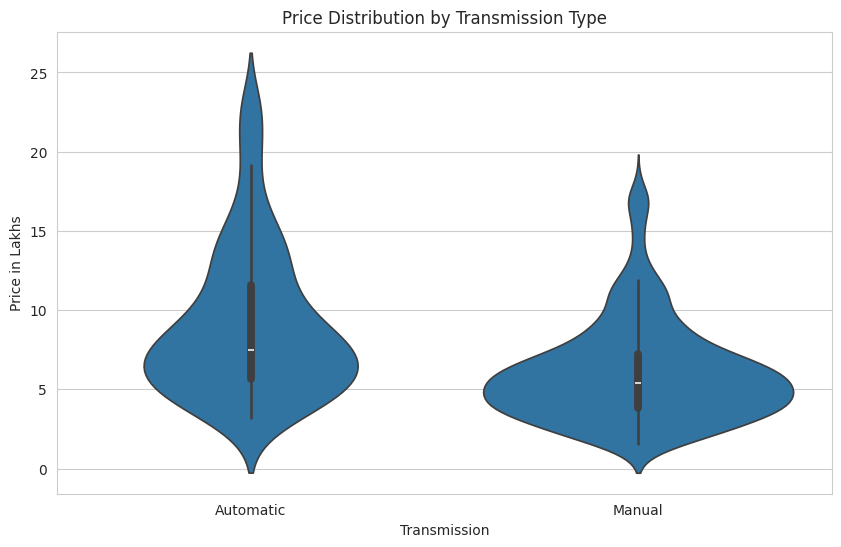

In [ ]:
plt.figure(figsize=(10, 6))  # Set the figure size
sns.violinplot(x='Transmission', y='Price_in_lakhs', data=data)
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price in Lakhs')
plt.show()

In [ ]:
# Select a subset of popular brands and their models for mileage analysis
# popular_brands = ['Maruti', 'Hyundai', 'KIA', 'Toyota']
popular_brands_1 = ['Maruti']
data_models_1 = data[data['Brand'].isin(popular_brands_1)]

Text(0, 0.5, 'Average Mileage (km/l)')

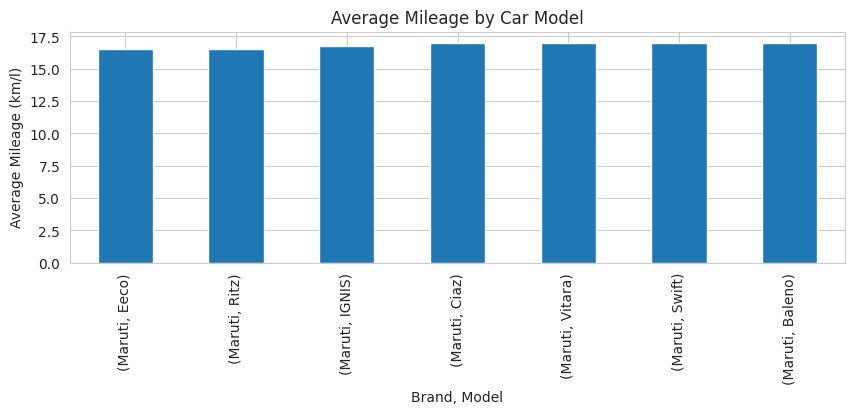

In [ ]:
# Bar plot for average mileage by model within brands
# plt.subplot(2, 2, 2)
plt.figure(figsize=(10, 3))
model_mileage_means = data_models_1.groupby(['Brand', 'Model'])['Mileage'].mean().sort_values()[:7]
model_mileage_means.plot(kind='bar')
plt.title('Average Mileage by Car Model')
plt.xlabel('Brand, Model')
plt.ylabel('Average Mileage (km/l)')

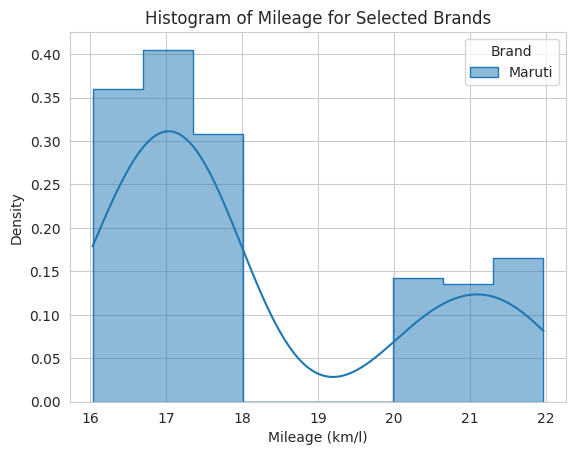

In [ ]:
# Histogram of mileage for selected brands
for brand in popular_brands_1:
    subset = data_models_1[data_models_1['Brand'] == brand]
    sns.histplot(subset['Mileage'], label=brand, kde=True, element='step', stat='density')
plt.title('Histogram of Mileage for Selected Brands')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Density')
plt.legend(title='Brand')

In [ ]:
popular_brands_2 = ['Hyundai']
data_models_2 = data[data['Brand'].isin(popular_brands_2)]

Text(0, 0.5, 'Average Mileage (km/l)')

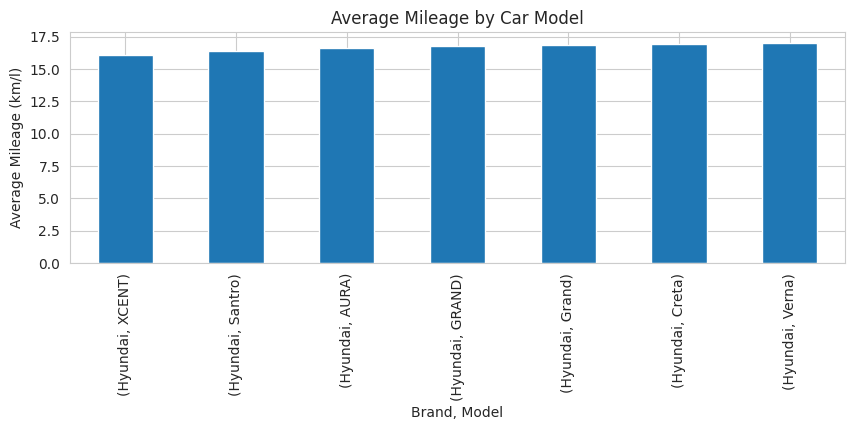

In [ ]:
# Bar plot for average mileage by model within brands
plt.figure(figsize=(10, 3))
model_mileage_means = data_models_2.groupby(['Brand', 'Model'])['Mileage'].mean().sort_values()[:7]
model_mileage_means.plot(kind='bar')
plt.title('Average Mileage by Car Model')
plt.xlabel('Brand, Model')
plt.ylabel('Average Mileage (km/l)')

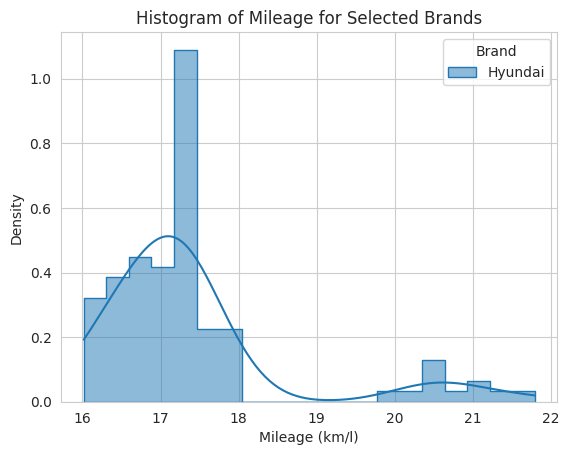

In [ ]:
# Histogram of mileage for selected brands
for brand in popular_brands_2:
    subset = data_models_2[data_models_2['Brand'] == brand]
    sns.histplot(subset['Mileage'], label=brand, kde=True, element='step', stat='density')
plt.title('Histogram of Mileage for Selected Brands')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Density')
plt.legend(title='Brand')

In [ ]:
# Select a subset of popular brands and their models for mileage analysis
# popular_brands = ['Maruti', 'Hyundai', 'KIA', 'Toyota']
popular_brands_3 = ['KIA']
data_models_3 = data[data['Brand'].isin(popular_brands_3)]

Text(0, 0.5, 'Average Mileage (km/l)')

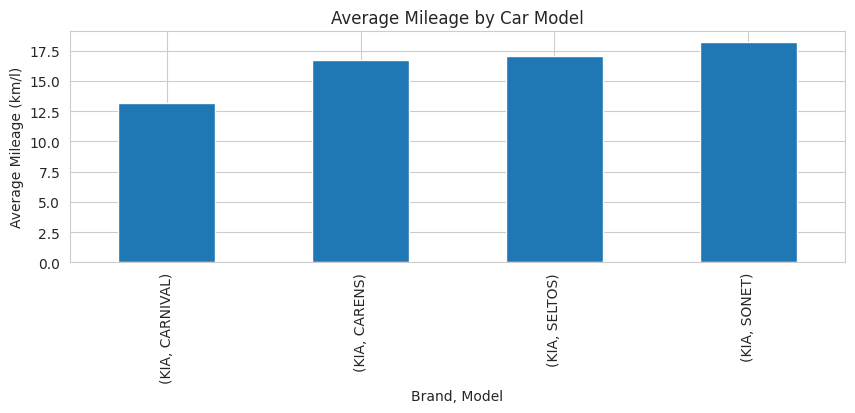

In [ ]:
# Bar plot for average mileage by model within brands
plt.figure(figsize=(10, 3))
model_mileage_means = data_models_3.groupby(['Brand', 'Model'])['Mileage'].mean().sort_values()[:4]
model_mileage_means.plot(kind='bar')
plt.title('Average Mileage by Car Model')
plt.xlabel('Brand, Model')
plt.ylabel('Average Mileage (km/l)')

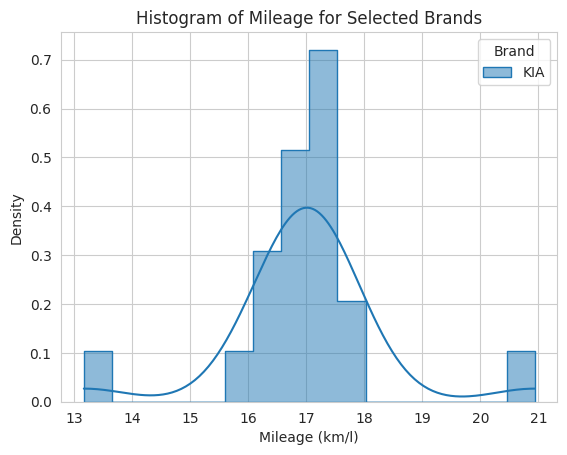

In [ ]:
# Histogram of mileage for selected brands
for brand in popular_brands_3:
    subset = data_models_3[data_models_3['Brand'] == brand]
    sns.histplot(subset['Mileage'], label=brand, kde=True, element='step', stat='density')
plt.title('Histogram of Mileage for Selected Brands')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Density')
plt.legend(title='Brand')

In [ ]:
# Select a subset of popular brands and their models for mileage analysis
# popular_brands = ['Maruti', 'Hyundai', 'KIA', 'Toyota']
popular_brands_4 = ['Toyota']
data_models_4 = data[data['Brand'].isin(popular_brands_4)]

Text(0, 0.5, 'Average Mileage (km/l)')

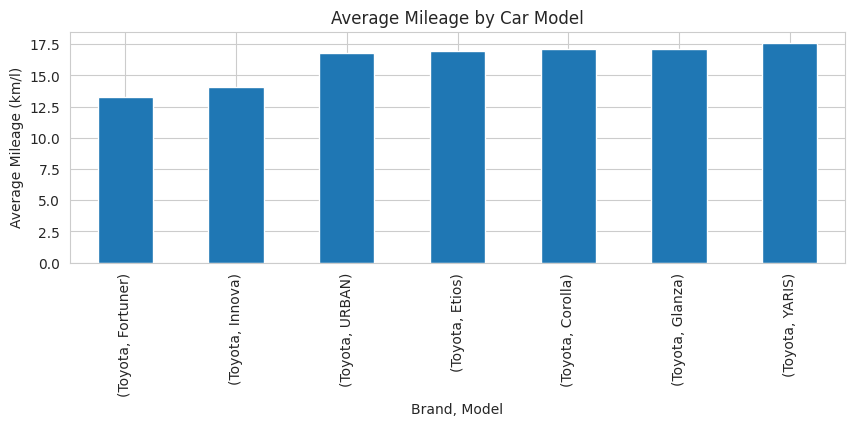

In [ ]:
# Bar plot for average mileage by model within brands
plt.figure(figsize=(10, 3))
model_mileage_means = data_models_4.groupby(['Brand', 'Model'])['Mileage'].mean().sort_values()[:7]
model_mileage_means.plot(kind='bar')
plt.title('Average Mileage by Car Model')
plt.xlabel('Brand, Model')
plt.ylabel('Average Mileage (km/l)')

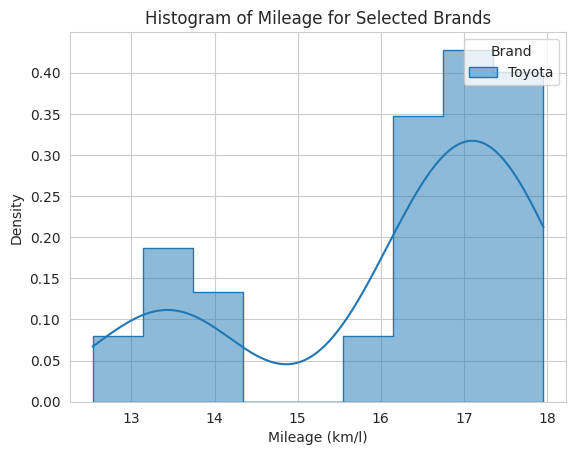

In [ ]:
# Histogram of mileage for selected brands
for brand in popular_brands_4:
    subset = data_models_4[data_models_4['Brand'] == brand]
    sns.histplot(subset['Mileage'], label=brand, kde=True, element='step', stat='density')
plt.title('Histogram of Mileage for Selected Brands')
plt.xlabel('Mileage (km/l)')
plt.ylabel('Density')
plt.legend(title='Brand')

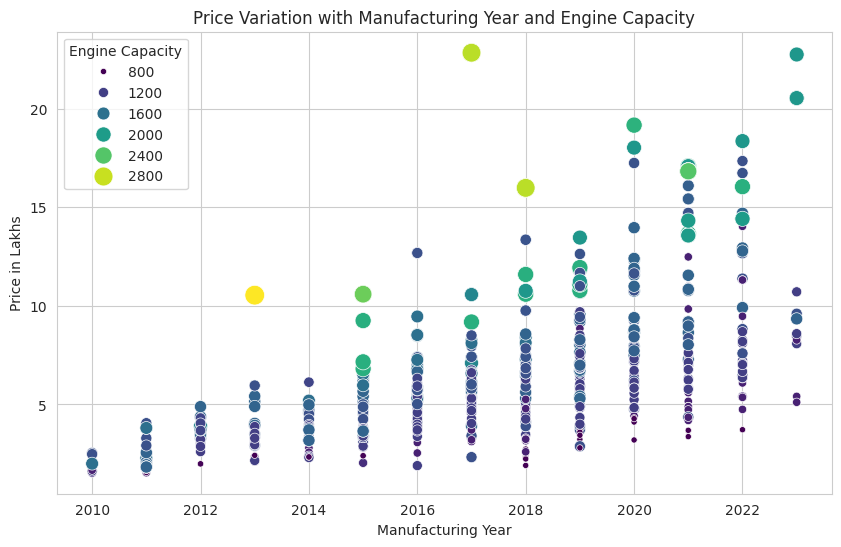

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Make Year', y='Price_in_lakhs', size='Engine Capacity', hue='Engine Capacity', palette='viridis', sizes=(20, 200))
plt.title('Price Variation with Manufacturing Year and Engine Capacity')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price in Lakhs')
plt.grid(True)
plt.show()

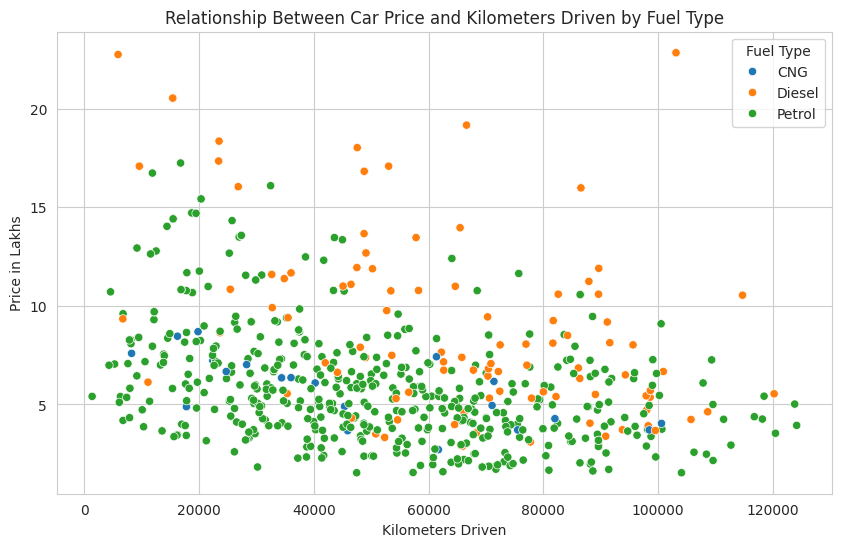

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='KM Driven', y='Price_in_lakhs', hue='Fuel Type')
plt.title('Relationship Between Car Price and Kilometers Driven by Fuel Type')
plt.xlabel('Kilometers Driven')
plt.ylabel('Price in Lakhs')
plt.grid(True)
plt.show()

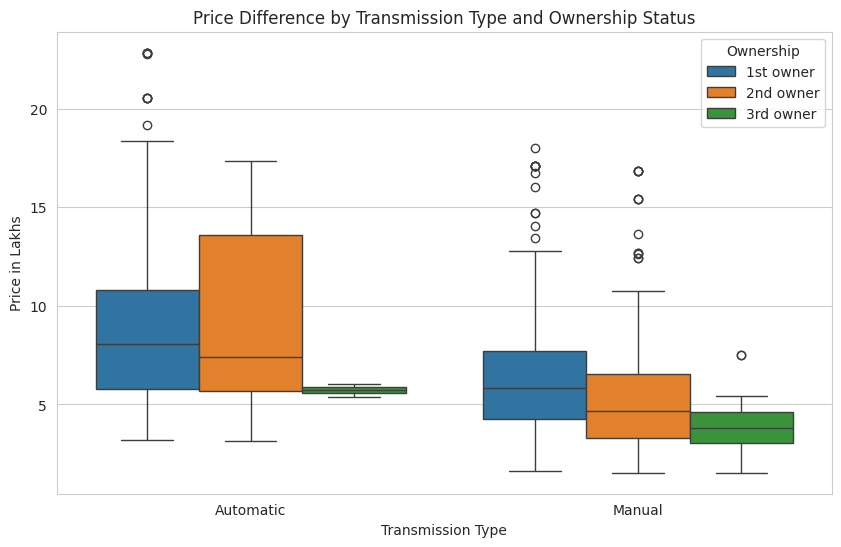

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Transmission', y='Price_in_lakhs', hue='Ownership')
plt.title('Price Difference by Transmission Type and Ownership Status')
plt.xlabel('Transmission Type')
plt.ylabel('Price in Lakhs')
plt.show()

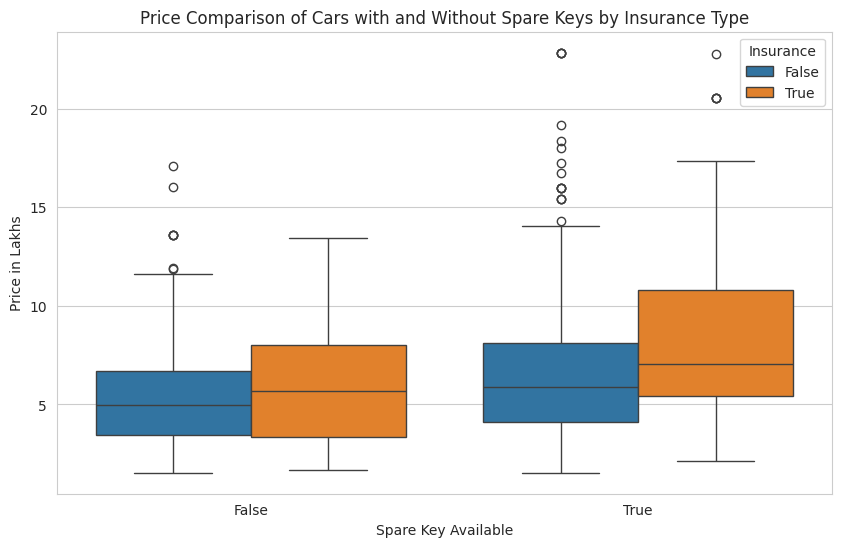

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data, x='Spare key', y='Price_in_lakhs', hue='Insurance')
plt.title('Price Comparison of Cars with and Without Spare Keys by Insurance Type')
plt.xlabel('Spare Key Available')
plt.ylabel('Price in Lakhs')
plt.show()

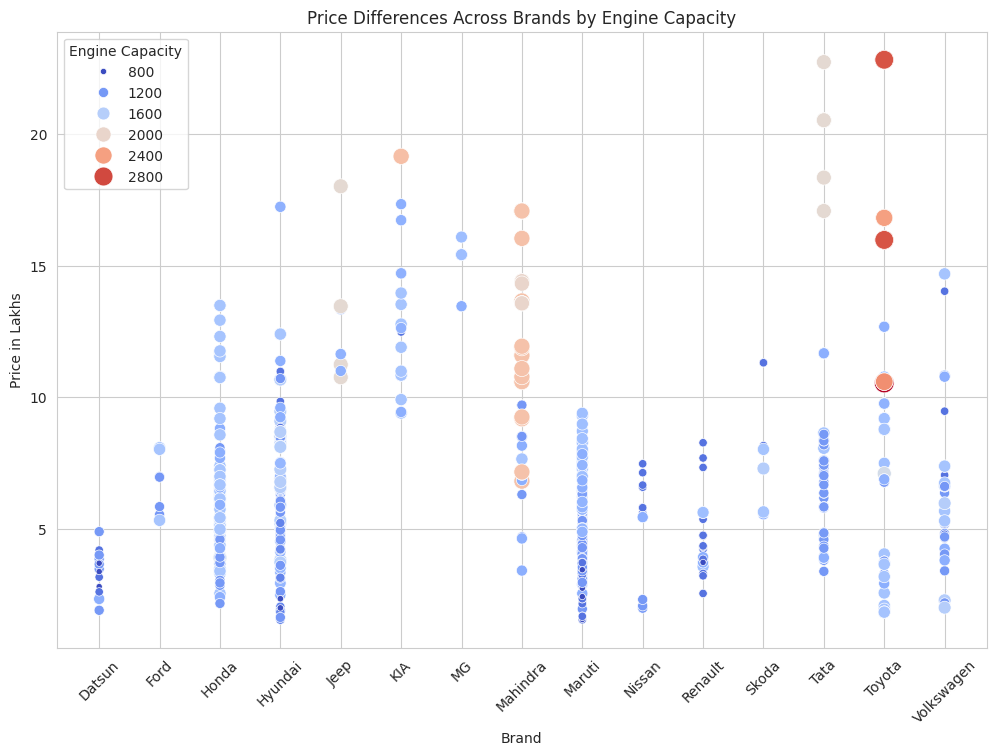

In [ ]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=data, x='Brand', y='Price_in_lakhs', size='Engine Capacity', hue='Engine Capacity', palette='coolwarm', sizes=(20, 200))
plt.title('Price Differences Across Brands by Engine Capacity')
plt.xticks(rotation=45)
plt.xlabel('Brand')
plt.ylabel('Price in Lakhs')
plt.grid(True)
plt.show()


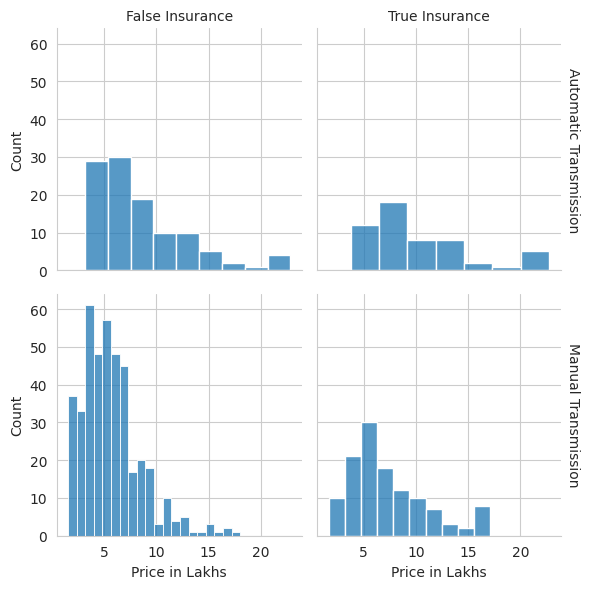

In [ ]:
g = sns.FacetGrid(data, col="Insurance", row="Transmission", margin_titles=True)
g.map_dataframe(sns.histplot, x="Price_in_lakhs")
g.set_axis_labels("Price in Lakhs", "Count")
g.set_titles(col_template="{col_name} Insurance", row_template="{row_name} Transmission")
g.tight_layout()
plt.show()

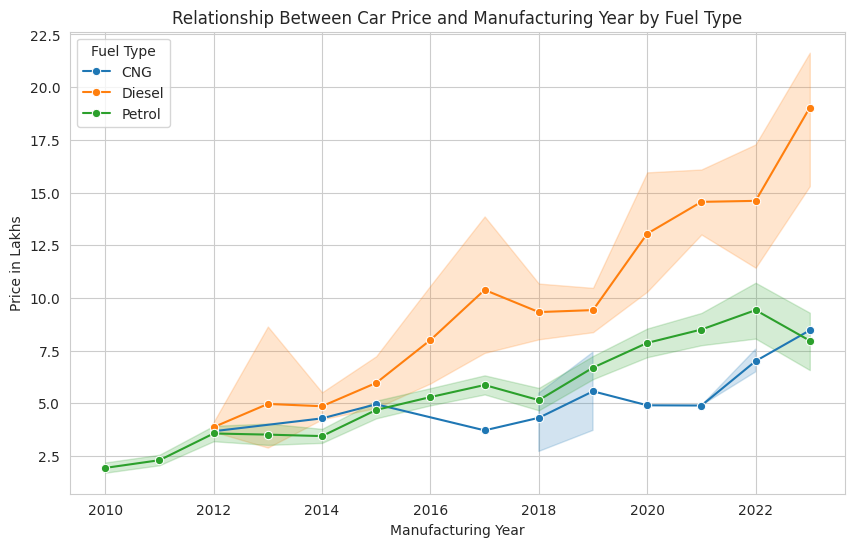

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=data, x='Make Year', y='Price_in_lakhs', hue='Fuel Type', marker='o')
plt.title('Relationship Between Car Price and Manufacturing Year by Fuel Type')
plt.xlabel('Manufacturing Year')
plt.ylabel('Price in Lakhs')
plt.grid(True)
plt.show()

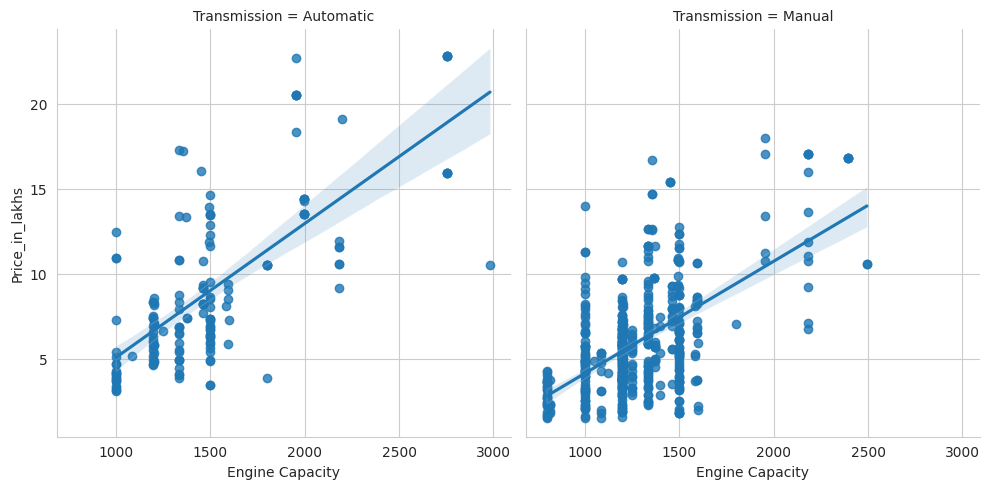

In [ ]:
sns.lmplot(data=data, x='Engine Capacity', y='Price_in_lakhs', col='Transmission', fit_reg=True)
plt.show()


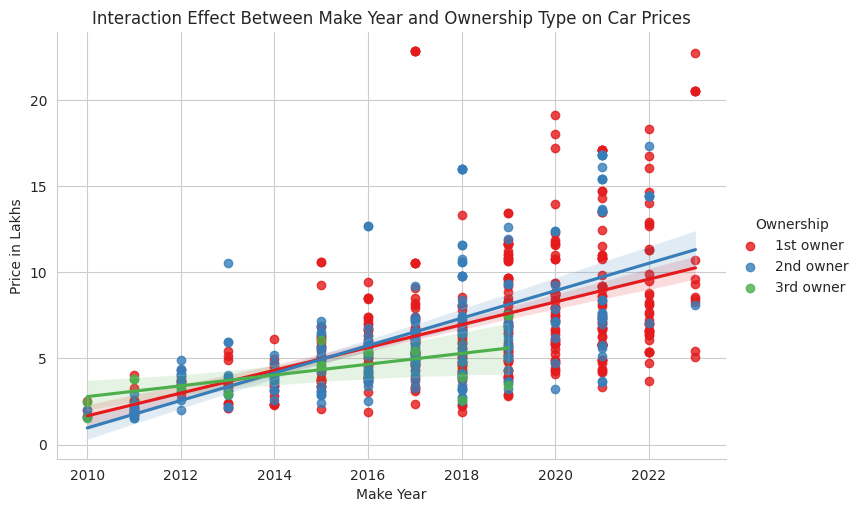

In [ ]:
sns.lmplot(data=data, x='Make Year', y='Price_in_lakhs', hue='Ownership', palette='Set1', aspect=1.5)
plt.title('Interaction Effect Between Make Year and Ownership Type on Car Prices')
plt.xlabel('Make Year')
plt.ylabel('Price in Lakhs')
plt.show()

# **Feature Selection**



## **Variance Threshold :**

In [ ]:
from sklearn.feature_selection import VarianceThreshold

numerical_data = data_encoded.select_dtypes(include=['int64', 'float64'])

# Apply Variance Threshold with a threshold of 0.08
selector = VarianceThreshold(threshold=0.08)
selector.fit(numerical_data)

high_variance_features = numerical_data.columns[selector.get_support()]

high_variance_features

Index(['Make Year', 'Engine Capacity', 'KM Driven', 'Ownership',
       'Price_in_lakhs', 'EMI/month', 'Mileage', 'Age_of_vehicle'],
      dtype='object')

Here is the results of Top columns by descending order using Feature selction techinique "Variance Threshold" that we can take into consideration, in this method the features with low variance or constant are not to considered..

## **Mutual_info_regression :**

In [ ]:
data_encoded

,Car Name,Reg month,Make Year,Engine Capacity,Insurance,Spare key,KM Driven,Ownership,Price_in_lakhs,EMI/month,Brand,Model,Mileage,Registered State,Age_of_vehicle,Transmission_Automatic,Transmission_Manual,Fuel Type_CNG,Fuel Type_Diesel,Fuel Type_Petrol
0,2016 Maruti Celerio VXI AMT,Nov,2016,998.000000,True,True,53167,0.0,4.13,8074.0,Maruti,Celerio,20.866233,Telangana,8,True,False,False,False,True
1,2020 Hyundai GRAND I10 NIOS SPORTZ 1.0 TURBO G...,Feb,2020,1334.749186,False,True,10622,1.0,7.17,14017.0,Hyundai,GRAND,17.229186,Telangana,4,False,True,False,False,True
2,2021 KIA SONET GTX PLUS 1.0 DCT DUAL TONE,Feb,2021,998.000000,True,True,38579,0.0,12.48,23755.0,KIA,SONET,20.938250,Telangana,3,True,False,False,False,True
3,2019 Hyundai NEW SANTRO SPORTZ AMT,Apr,2019,1086.000000,False,True,25316,1.0,5.17,10113.0,Hyundai,NEW,17.190135,Telangana,5,True,False,False,False,True
4,2021 Tata TIGOR XE PETROL,Dec,2021,1199.000000,True,True,47307,0.0,5.86,11456.0,Tata,TIGOR,17.434523,Telangana,3,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,2017 Maruti Ciaz ALPHA 1.4 PETROL,Oct,2017,1373.000000,False,False,65385,0.0,5.82,11378.0,Maruti,Ciaz,17.497993,Uttar Pradesh,7,False,True,False,False,True
696,2017 Maruti Ciaz DELTA 1.4 MT PETROL,Aug,2017,1373.000000,False,True,48565,0.0,6.02,11769.0,Maruti,Ciaz,17.782142,Delhi,7,False,True,False,False,True
697,2018 Maruti Ciaz SIGMA 1.5 SHVS MT PETROL,Feb,2018,1334.749186,False,True,42990,0.0,6.84,13372.0,Maruti,Ciaz,17.229186,Delhi,6,False,True,False,False,True
698,2018 Maruti Ciaz ALPHA AT 1.4 PETROL,Jul,2018,1373.000000,False,False,48743,1.0,7.42,14506.0,Maruti,Ciaz,16.593284,Haryana,6,True,False,False,False,True


In [ ]:
X = data_encoded.drop(columns=['Brand','Model','Car Name','Price_in_lakhs','EMI/month','Reg month','Registered State'])
y = data_encoded['Price_in_lakhs']

mi_scores = mutual_info_regression(X, y)
mi_results = pd.Series(mi_scores, index=X.columns).sort_values(ascending=False)

# Display the top 7 features based on mutual information
top_7_mi_features = mi_results.head(7)

In [ ]:
top_7_mi_features

KM Driven                 0.768170
Engine Capacity           0.714127
Age_of_vehicle            0.591600
Make Year                 0.590291
Mileage                   0.159953
Transmission_Automatic    0.146416
Fuel Type_Diesel          0.140822
dtype: float64

Here is the results of Top columns by descending order using Feature selction techinique "Mutual-info regressor" that we can take into consideration, the higher the value of mutual info the more important the features has to be considered..

## **Pearson Coe-relation :**

In [ ]:
# Correlation of numerical features with the target
correlation_data = numerical_data.join(data_encoded[['Transmission_Automatic', 'Transmission_Manual']])
correlation_scores = correlation_data.corr()['Price_in_lakhs'].sort_values(ascending=False)

# Display correlation scores of the top features
correlation_scores.drop('Price_in_lakhs').head(7)

EMI/month                 0.779998
Engine Capacity           0.672355
Make Year                 0.557797
Transmission_Automatic    0.339933
Ownership                -0.109579
KM Driven                -0.280909
Transmission_Manual      -0.339933
Name: Price_in_lakhs, dtype: float64

Here is the results of Top columns by descending order using Feature selction techinique "coerelation" that we can take into consideration.

#Feature Transformation

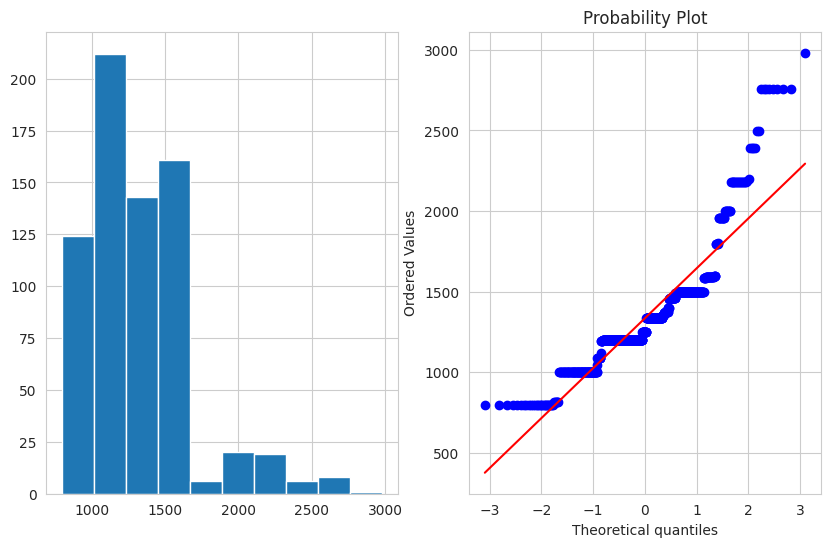

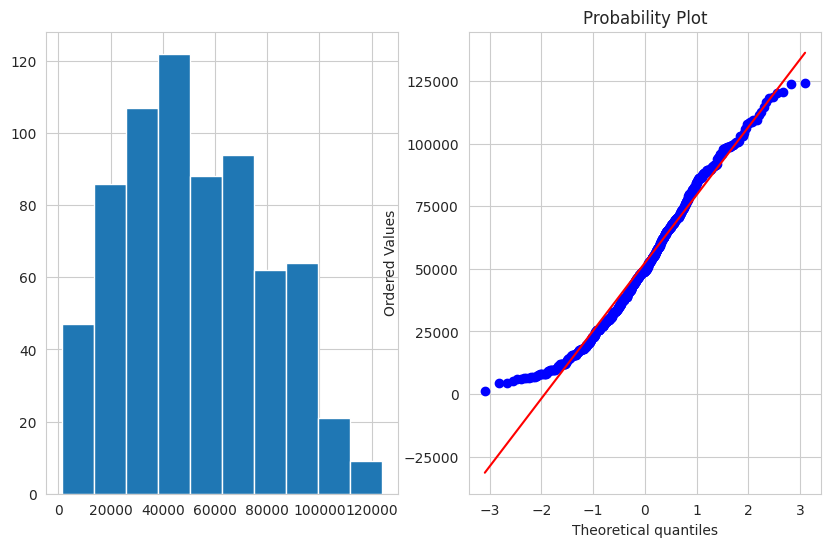

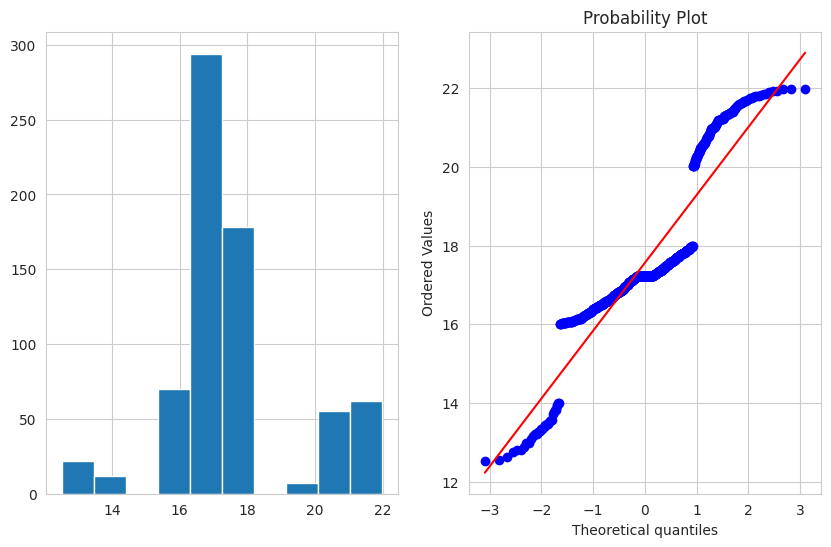

In [ ]:
def plot_data(df, feature):
    plt.figure(figsize=(10, 6))
    plt.subplot(1, 2, 1)
    df[feature].hist()
    plt.subplot(1, 2, 2)
    stat.probplot(df[feature], dist='norm', plot=pylab)
    plt.show()

for feature in ['Engine Capacity', 'KM Driven', 'Mileage']:
    plot_data(data_encoded, feature)

### **Application of log and BoxCox Transformation**

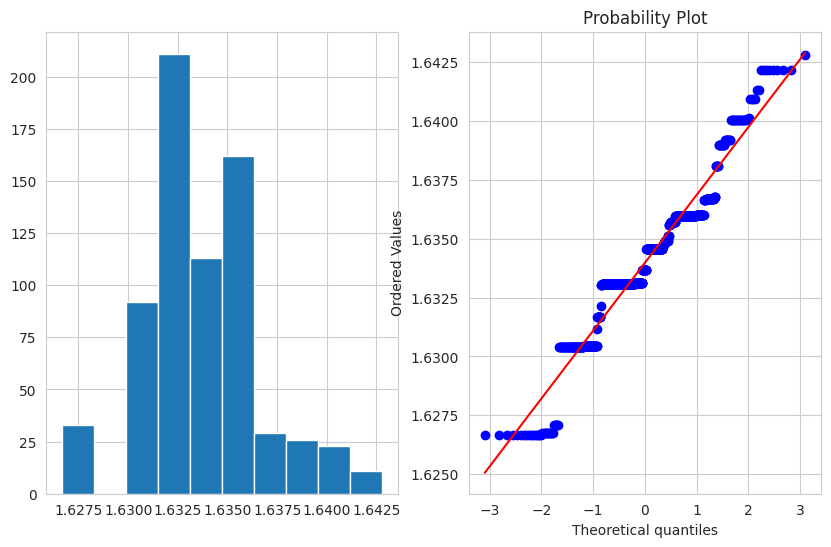

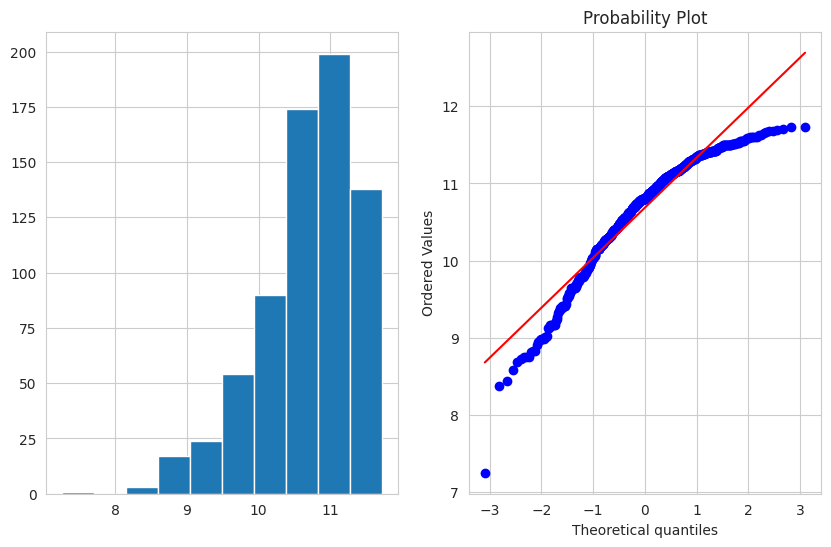

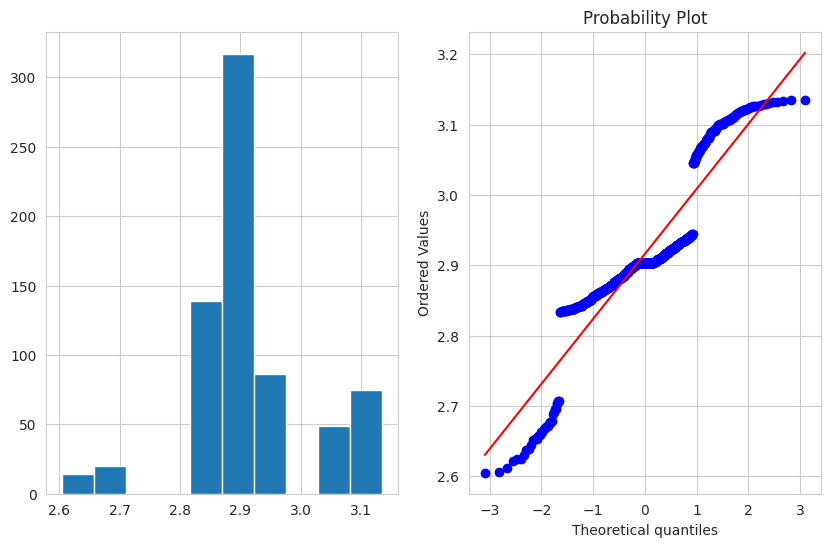

In [ ]:
from scipy import stats
import pylab

transformed_data = data_encoded.copy()

transformed_data['Log_KM Driven'] = np.log1p(transformed_data['KM Driven'])
transformed_data['Log_Mileage'] = np.log1p(transformed_data['Mileage'])

transformed_data['BoxCox_Engine Capacity'], fitted_lambda = stats.boxcox(transformed_data['Engine Capacity'])

for feature in ['BoxCox_Engine Capacity', 'Log_KM Driven', 'Log_Mileage']:
    plot_data(transformed_data, feature)

Appliying Feature Trandformation on Numerical Features for better distribution.

# Model Fitting

## **Problem - 1 : Price Prediction**
**Problem Statement:**
Predict the price of a used car based on its features such as make year, brand, model, mileage, engine capacity, and other available features.

**Model Type:** Regression model (e.g., Linear Regression, Random Forest).

**Procedure :**

* In this Section Of analysied "Model-Fitting" by use of Feature Selcection
method like Variance Threshold, Mutual -Information,Pearson Coe-relation through which we choosen top K features,in our case we have taken top 7 features and tried to apply Feature transformation technique inoreder to transform feature distribution to Gaussian Distribution.

* In Model Fitting for price prediction we are bound to use Regressor Model like Linear regression , RandomForest Regressor, and also applied boosting technique like XGboost regressor to train our problem. to solve prediction cases.

* Next, we tried to implement model fitting without Feature selection and transformation and see how it differ from above Transformations.

* At last , we comapre different model using evulation metric for regressor like MAE,R^2 score,MSE etc.


### Model Fitting using Feature Transformation

In [ ]:
from sklearn.model_selection import train_test_split

features = ['BoxCox_Engine Capacity', 'Log_KM Driven', 'Log_Mileage', 'Insurance',
            'Spare key', 'Ownership', 'Make Year','Transmission_Automatic','Transmission_Manual']

X_transformed = transformed_data[features]
y_transformed = transformed_data['Price_in_lakhs']

X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((560, 9), (140, 9), (560,), (140,))

* We have taken our transforemed features into our consideration along with necessary features and stored in "X_transformed" and "y_transformed".
* Next applied Train-test split for model fitting.


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Training of Regression model with Train and Test Set like X_train, X_test, y_train, y_test.

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = mean_squared_error(y_test,y_pred, squared=False)
r2 = r2_score(y_test,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 1.5646141433080816
Mean Squared Error: 4.403780130801437
Root Mean Squared Error: 2.0985185562204203
R-squared: 0.7132974609521099


Here is the Evulation of Metric performed on Price Prediction using feature transformation along with regressor model.

In [ ]:
data.head()

,Car Name,Reg month,Make Year,Engine Capacity,Insurance,Spare key,Transmission,KM Driven,Ownership,Fuel Type,Price_in_lakhs,EMI/month,Brand,Model,Mileage,Registered State,Age_of_vehicle
0,2016 Maruti Celerio VXI AMT,Nov,2016,998.000000,True,True,Automatic,53167,1st owner,Petrol,4.13,8074.0,Maruti,Celerio,20.866233,Telangana,8
1,2020 Hyundai GRAND I10 NIOS SPORTZ 1.0 TURBO G...,Feb,2020,1334.749186,False,True,Manual,10622,2nd owner,Petrol,7.17,14017.0,Hyundai,GRAND,17.229186,Telangana,4
2,2021 KIA SONET GTX PLUS 1.0 DCT DUAL TONE,Feb,2021,998.000000,True,True,Automatic,38579,1st owner,Petrol,12.48,23755.0,KIA,SONET,20.938250,Telangana,3
3,2019 Hyundai NEW SANTRO SPORTZ AMT,Apr,2019,1086.000000,False,True,Automatic,25316,2nd owner,Petrol,5.17,10113.0,Hyundai,NEW,17.190135,Telangana,5
4,2021 Tata TIGOR XE PETROL,Dec,2021,1199.000000,True,True,Manual,47307,1st owner,Petrol,5.86,11456.0,Tata,TIGOR,17.434523,Telangana,3


### **Model Fitting without Feature Transformation**

#### **Linear Regression :**



In [ ]:
X = data_encoded.drop(['Brand', 'Price_in_lakhs','Model','Registered State'], axis=1)
y = data_encoded['Price_in_lakhs']

Dividing into Features and Target variable with neccessary encoded features.

### **Linear Regression :**

In [ ]:
if 'Car Name' in X.columns:
    X = X.drop('Car Name', axis=1)

categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols)

X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state=42)
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_lr = model1.predict(X_test)

Model Training!!

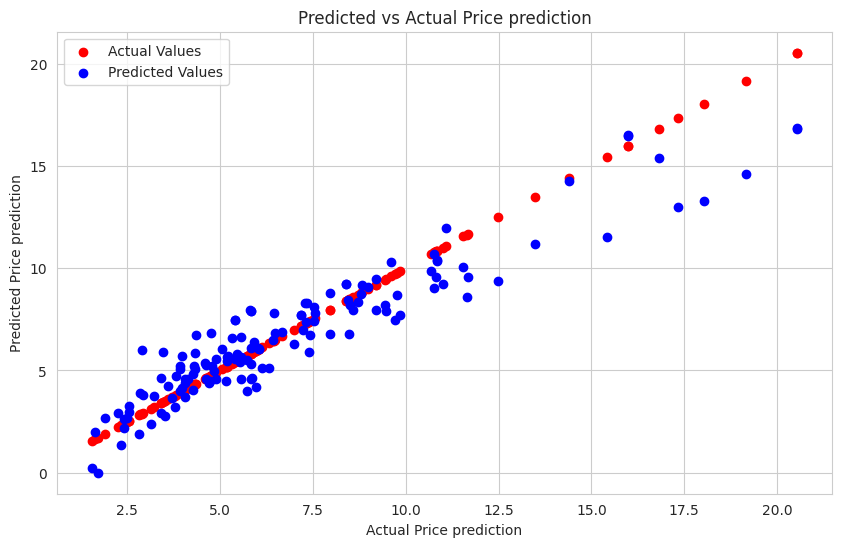

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='red', label='Actual Values')

# Add a scatter plot for y_pred
plt.scatter(y_test, y_pred_lr, color='blue', label='Predicted Values')

# Customize plot labels and title
plt.xlabel('Actual Price prediction')
plt.ylabel('Predicted Price prediction')
plt.title('Predicted vs Actual Price prediction')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred_lr)
mse = mean_squared_error(y_test,y_pred_lr)
rmse = mean_squared_error(y_test,y_pred_lr, squared=False)
r2 = r2_score(y_test,y_pred_lr)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 1.0083166571196618
Mean Squared Error: 1.9491079768427848
Root Mean Squared Error: 1.3961045723164096
R-squared: 0.8731057888356417


### XGBoost Regressor

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


reg_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

reg_model.fit(X_train, y_train)

y_pred_Xgreg = reg_model.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_pred_Xgreg)
mse = mean_squared_error(y_test,y_pred_Xgreg)
rmse = mean_squared_error(y_test,y_pred_Xgreg, squared=False)
r2 = r2_score(y_test,y_pred_Xgreg)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.1519731834956578
Mean Squared Error: 0.24089085973190286
Root Mean Squared Error: 0.49080633627929343
R-squared: 0.984317105062646


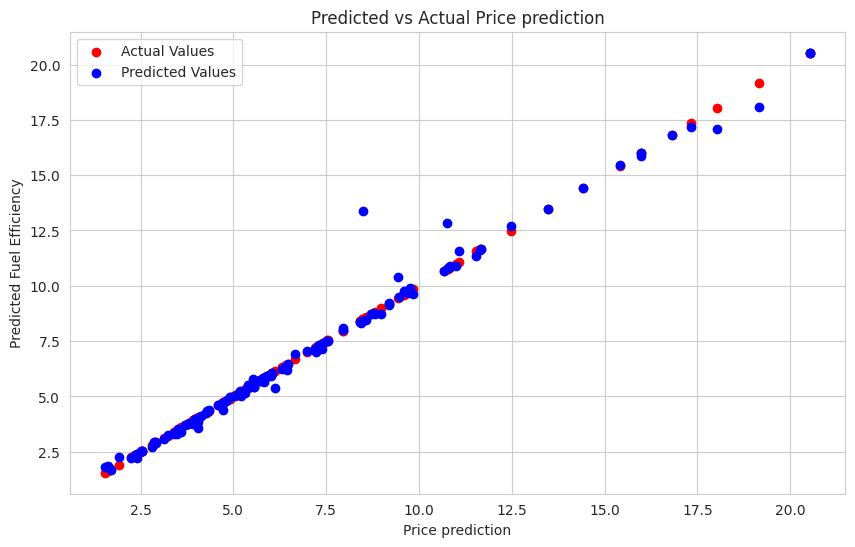

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='red', label='Actual Values')

# Add a scatter plot for y_pred_reg
plt.scatter(y_test, y_pred_Xgreg, color='blue', label='Predicted Values')

# Customize plot labels and title
plt.xlabel('Price prediction')
plt.ylabel('Predicted Fuel Efficiency')
plt.title('Predicted vs Actual Price prediction')
plt.legend()
plt.grid(True)
plt.show()


### **RandomForest Regressor :**

In [ ]:
model3 = RandomForestRegressor(n_estimators=100, random_state=42)
model3.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_predRf = model3.predict(X_test)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test,y_predRf)
mse = mean_squared_error(y_test,y_predRf)
rmse = mean_squared_error(y_test,y_predRf, squared=False)
r2 = r2_score(y_test,y_predRf)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.22185857142857288
Mean Squared Error: 0.3735477840000019
Root Mean Squared Error: 0.6111855561120549
R-squared: 0.9756806436862181


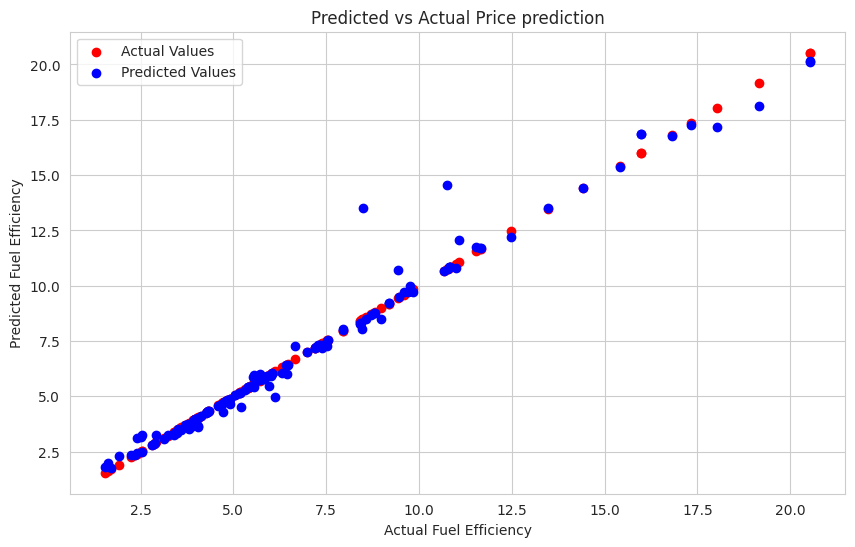

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot for y_test
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test, color='red', label='Actual Values')

# Add a scatter plot fpr y_pred
plt.scatter(y_test,y_predRf, color='blue', label='Predicted Values')

# Customize plot labels and title
plt.xlabel('Actual Fuel Efficiency')
plt.ylabel('Predicted Fuel Efficiency')
plt.title('Predicted vs Actual Price prediction')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Metrics for Random Forest Regressor
mae_rf = mean_absolute_error(y_test, y_predRf)
mse_rf = mean_squared_error(y_test, y_predRf)
rmse_rf = mean_squared_error(y_test, y_predRf, squared=False)
r2_rf = r2_score(y_test, y_predRf)

# Metrics for XGBoost Regressor
mae_xgb = mean_absolute_error(y_test, y_pred_Xgreg)
mse_xgb = mean_squared_error(y_test, y_pred_Xgreg)
rmse_xgb = mean_squared_error(y_test, y_pred_Xgreg, squared=False)
r2_xgb = r2_score(y_test, y_pred_Xgreg)

# Metrics for Linear Regression
mae_linear = mean_absolute_error(y_test, y_pred_lr)
mse_linear = mean_squared_error(y_test, y_pred_lr)
rmse_linear = mean_squared_error(y_test, y_pred_lr, squared=False)
r2_linear = r2_score(y_test, y_pred_lr)

# Display the results in a table-like format
print("| Metric                  | Random Forest | XGBoost    | Linear Regression |")
print("|-------------------------|---------------|------------|-------------------|")
print(f"| Mean Absolute Error     | {mae_rf:.4f}       | {mae_xgb:.4f}    | {mae_linear:.4f}           |")
print(f"| Mean Squared Error      | {mse_rf:.4f}       | {mse_xgb:.4f}    | {mse_linear:.4f}           |")
print(f"| Root Mean Squared Error | {rmse_rf:.4f}       | {rmse_xgb:.4f}    | {rmse_linear:.4f}           |")
print(f"| R-squared               | {r2_rf:.4f}       | {r2_xgb:.4f}    | {r2_linear:.4f}           |")


| Metric                  | Random Forest | XGBoost    | Linear Regression |
|-------------------------|---------------|------------|-------------------|
| Mean Absolute Error     | 0.2219       | 0.1520    | 1.0083           |
| Mean Squared Error      | 0.3735       | 0.2409    | 1.9491           |
| Root Mean Squared Error | 0.6112       | 0.4908    | 1.3961           |
| R-squared               | 0.9757       | 0.9843    | 0.8731           |


## **Problem -2 : Fuel Efficiency Prediction**
**Problem Statement:** Predict the fuel efficiency (mileage) of cars based on their engine specifications, make year, and other features.

**Model Type:** Regression analysis.

**Procedure :**

* In this Section of "Fuel Efficiency Prediction", we consider "Mileage" as our main Target variable,and took independent features like Model, brand,'Transmission', 'Fuel Type','Ownership' etc for better analysis of Fuel Consumpution.

* Firstly, we need our Feature variable and target variable in hand, so for feature variable there were some column which is directly effect the target varible, so to consider them we have applied One hot Encoding for better model interpretation.

* Next,we consider the feature and target part seperately and applied Train-test split for better model training adn overcome over-fitting.

* Now , we have implemented regressor models like linear regreesion, RandomForest Regressor, and also applied boosting technique like XGboost regressor to train our problem.

* At last , we comapre different model using evulation metric for regressor like MAE,R^2 score,MSE etc.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# One-hot encoding for categorical variables without a natural order
one_hot_cols = ['Brand','Model','Transmission', 'Fuel Type','Ownership']
data_encoded_fuel = pd.get_dummies(data, columns=one_hot_cols)

In [ ]:
# features = ['Fuel Type_CNG',	'Fuel Type_Diesel',	'Fuel Type_Petrol', 'Transmission_Automatic', 'Engine Capacity','Transmission_Manual','Mileage']
features = data_encoded_fuel.drop(['Car Name','Reg month','Registered State'],axis = 1)
target = 'Mileage'

In [ ]:
X_fuel = features.drop(['Mileage'], axis=1)
y_fuel = features['Mileage']
X_train_fuel, X_test_fuel, y_train_fuel, y_test_fuel = train_test_split(X_fuel, y_fuel, test_size=0.2, random_state=42)

In [ ]:
data_encoded_fuel.shape

(700, 115)

### **Linear Regression :**

In [ ]:
model = LinearRegression()
model.fit(X_train_fuel, y_train_fuel)

y_pred = model.predict(X_test_fuel)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_fuel,y_pred)
mse = mean_squared_error(y_test_fuel,y_pred)
rmse = mean_squared_error(y_test_fuel,y_pred, squared=False)
r2 = r2_score(y_test_fuel,y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.6861643754594936
Mean Squared Error: 0.7715601426505856
Root Mean Squared Error: 0.8783849626733062
R-squared: 0.7862840468525493


### **XGBoost Classifier**

In [ ]:
reg_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

reg_model.fit(X_train_fuel, y_train_fuel)

y_pred_reg = reg_model.predict(X_test_fuel)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_fuel, y_pred_reg)
mse = mean_squared_error(y_test_fuel, y_pred_reg)
rmse = mean_squared_error(y_test_fuel, y_pred_reg, squared=False)
r2 = r2_score(y_test_fuel, y_pred_reg)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")


Mean Absolute Error: 0.46576041870253215
Mean Squared Error: 0.3639332757539409
Root Mean Squared Error: 0.6032688254451252
R-squared: 0.8991934100657001


### **RandomForest Regressor :**

In [ ]:
model_fuel = RandomForestRegressor(n_estimators=100, random_state=42, max_features='sqrt', max_depth=10)
model_fuel.fit(X_train_fuel, y_train_fuel)

RandomForestRegressor(max_depth=10, max_features='sqrt', random_state=42)

In [ ]:
y_pred_fuel = model_fuel.predict(X_test_fuel)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test_fuel, y_pred_fuel)
mse = mean_squared_error(y_test_fuel, y_pred_fuel)
rmse = mean_squared_error(y_test_fuel, y_pred_fuel, squared=False)
r2 = r2_score(y_test_fuel, y_pred_fuel)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: 0.6140019754484282
Mean Squared Error: 0.6107239266892724
Root Mean Squared Error: 0.7814882767446178
R-squared: 0.8308343849204499


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Car Name          700 non-null    object  
 1   Reg month         700 non-null    object  
 2   Make Year         700 non-null    int64   
 3   Engine Capacity   700 non-null    float64 
 4   Insurance         700 non-null    bool    
 5   Spare key         700 non-null    bool    
 6   Transmission      700 non-null    category
 7   KM Driven         700 non-null    int64   
 8   Ownership         700 non-null    category
 9   Fuel Type         700 non-null    category
 10  Price_in_lakhs    700 non-null    float64 
 11  EMI/month         700 non-null    float64 
 12  Brand             700 non-null    category
 13  Model             700 non-null    category
 14  Mileage           700 non-null    float64 
 15  Registered State  700 non-null    category
 16  Age_of_vehicle    700 non-